In [3]:
import numpy as np 
import pandas as pd

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from tqdm import tqdm_notebook
import plotly.figure_factory as ff



import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline


In [4]:
!pip install ipywidgets



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
data=pd.read_csv(r"C:\Users\Karthik\Downloads\water_potability.csv")
data.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

# EDA

* ph-> pH of water
* Hardness-> Capacity of water to precipitate soap in mg/L
* Solids-> Total dissolved solids in ppm
* Chloramines-> Amount of Chloramines in ppm
* Sulfate-> Amount of Sulfates dissolved in mg/L
* Conductivity-> Electrical conductivity of water in μS/cm
* Organic_carbon-> Amount of organic carbon in ppm
* Trihalomethanes-> Amount of Trihalomethanes in μg/L
* Turbidity-> Measure of light emiting property of water in NTU (Nephelometric Turbidity Units)
* Potability-> Indicates if water is safe for human consumption

In [9]:
data.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [11]:
print('There are {} data points and {} features in the data'.format(data.shape[0],data.shape[1]))

There are 3276 data points and 10 features in the data


## Null Values

<Axes: >

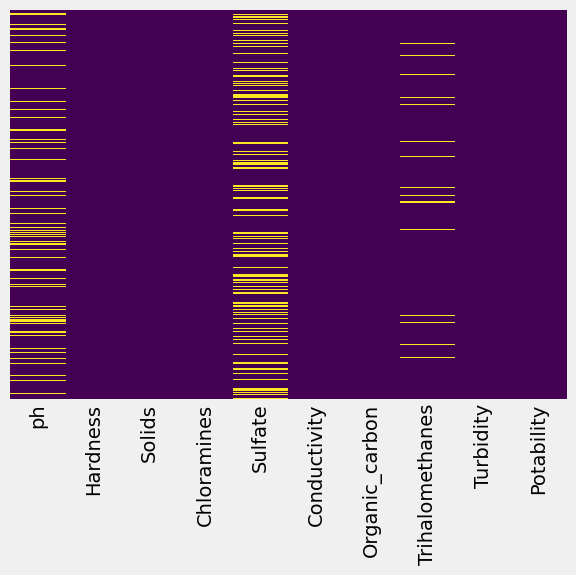

In [12]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
for i in data.columns:
    if data[i].isnull().sum()>0:
        print("{} Null values in {} column".format(data[i].isnull().sum(),i))

491 Null values in ph column
781 Null values in Sulfate column
162 Null values in Trihalomethanes column


## Handling Null Values

### PH

In [14]:
data['ph'].describe()

count    2785.000000
mean        7.080795
std         1.594320
min         0.000000
25%         6.093092
50%         7.036752
75%         8.062066
max        14.000000
Name: ph, dtype: float64

Filling the missing values by mean

In [15]:
data['ph_mean']=data['ph'].fillna(data['ph'].mean())

In [16]:
data['ph_mean'].isnull().sum()

np.int64(0)

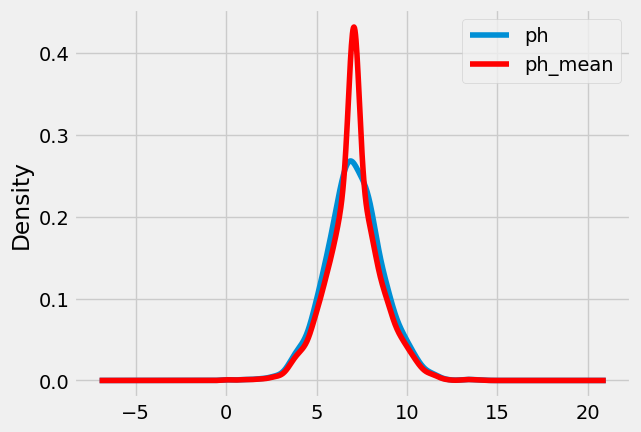

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
data['ph'].plot(kind='kde', ax=ax)
data.ph_mean.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

#### The distribution is not uniform

Filling the data with random values

In [18]:
def impute_nan(df,variable):
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [19]:
impute_nan(data,"ph")

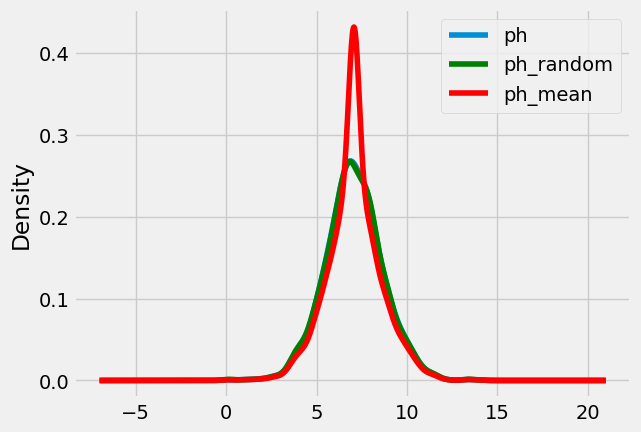

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)
data['ph'].plot(kind='kde', ax=ax)
data.ph_random.plot(kind='kde', ax=ax, color='green')
data.ph_mean.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

Uniform distribution with random initialization

In [21]:
impute_nan(data,"Sulfate")

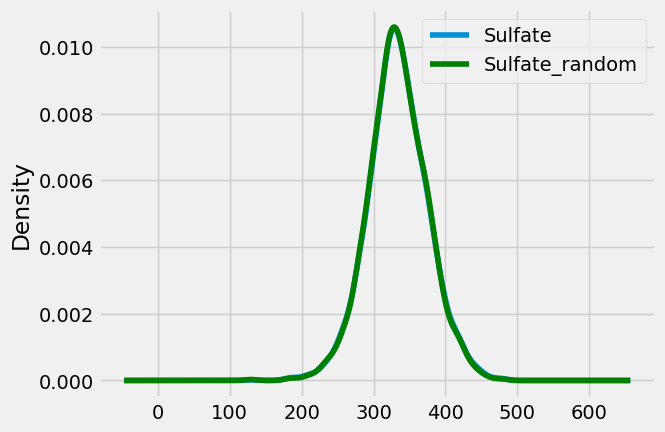

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)
data['Sulfate'].plot(kind='kde', ax=ax)
data["Sulfate_random"].plot(kind='kde', ax=ax, color='green')
#data.ph_mean.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

In [23]:
impute_nan(data,"Trihalomethanes")

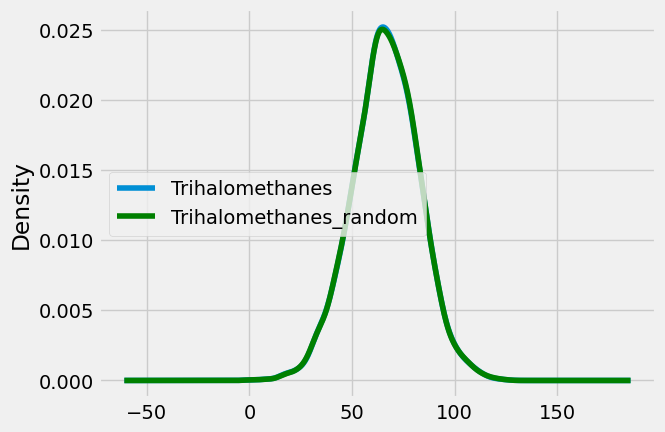

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)
data['Trihalomethanes'].plot(kind='kde', ax=ax)
data.Trihalomethanes_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

In [25]:
data=data.drop(['ph','Sulfate','Trihalomethanes','ph_mean'],axis=1)

In [26]:
data.isnull().sum()

Hardness                  0
Solids                    0
Chloramines               0
Conductivity              0
Organic_carbon            0
Turbidity                 0
Potability                0
ph_random                 0
Sulfate_random            0
Trihalomethanes_random    0
dtype: int64

## Check for Correlation

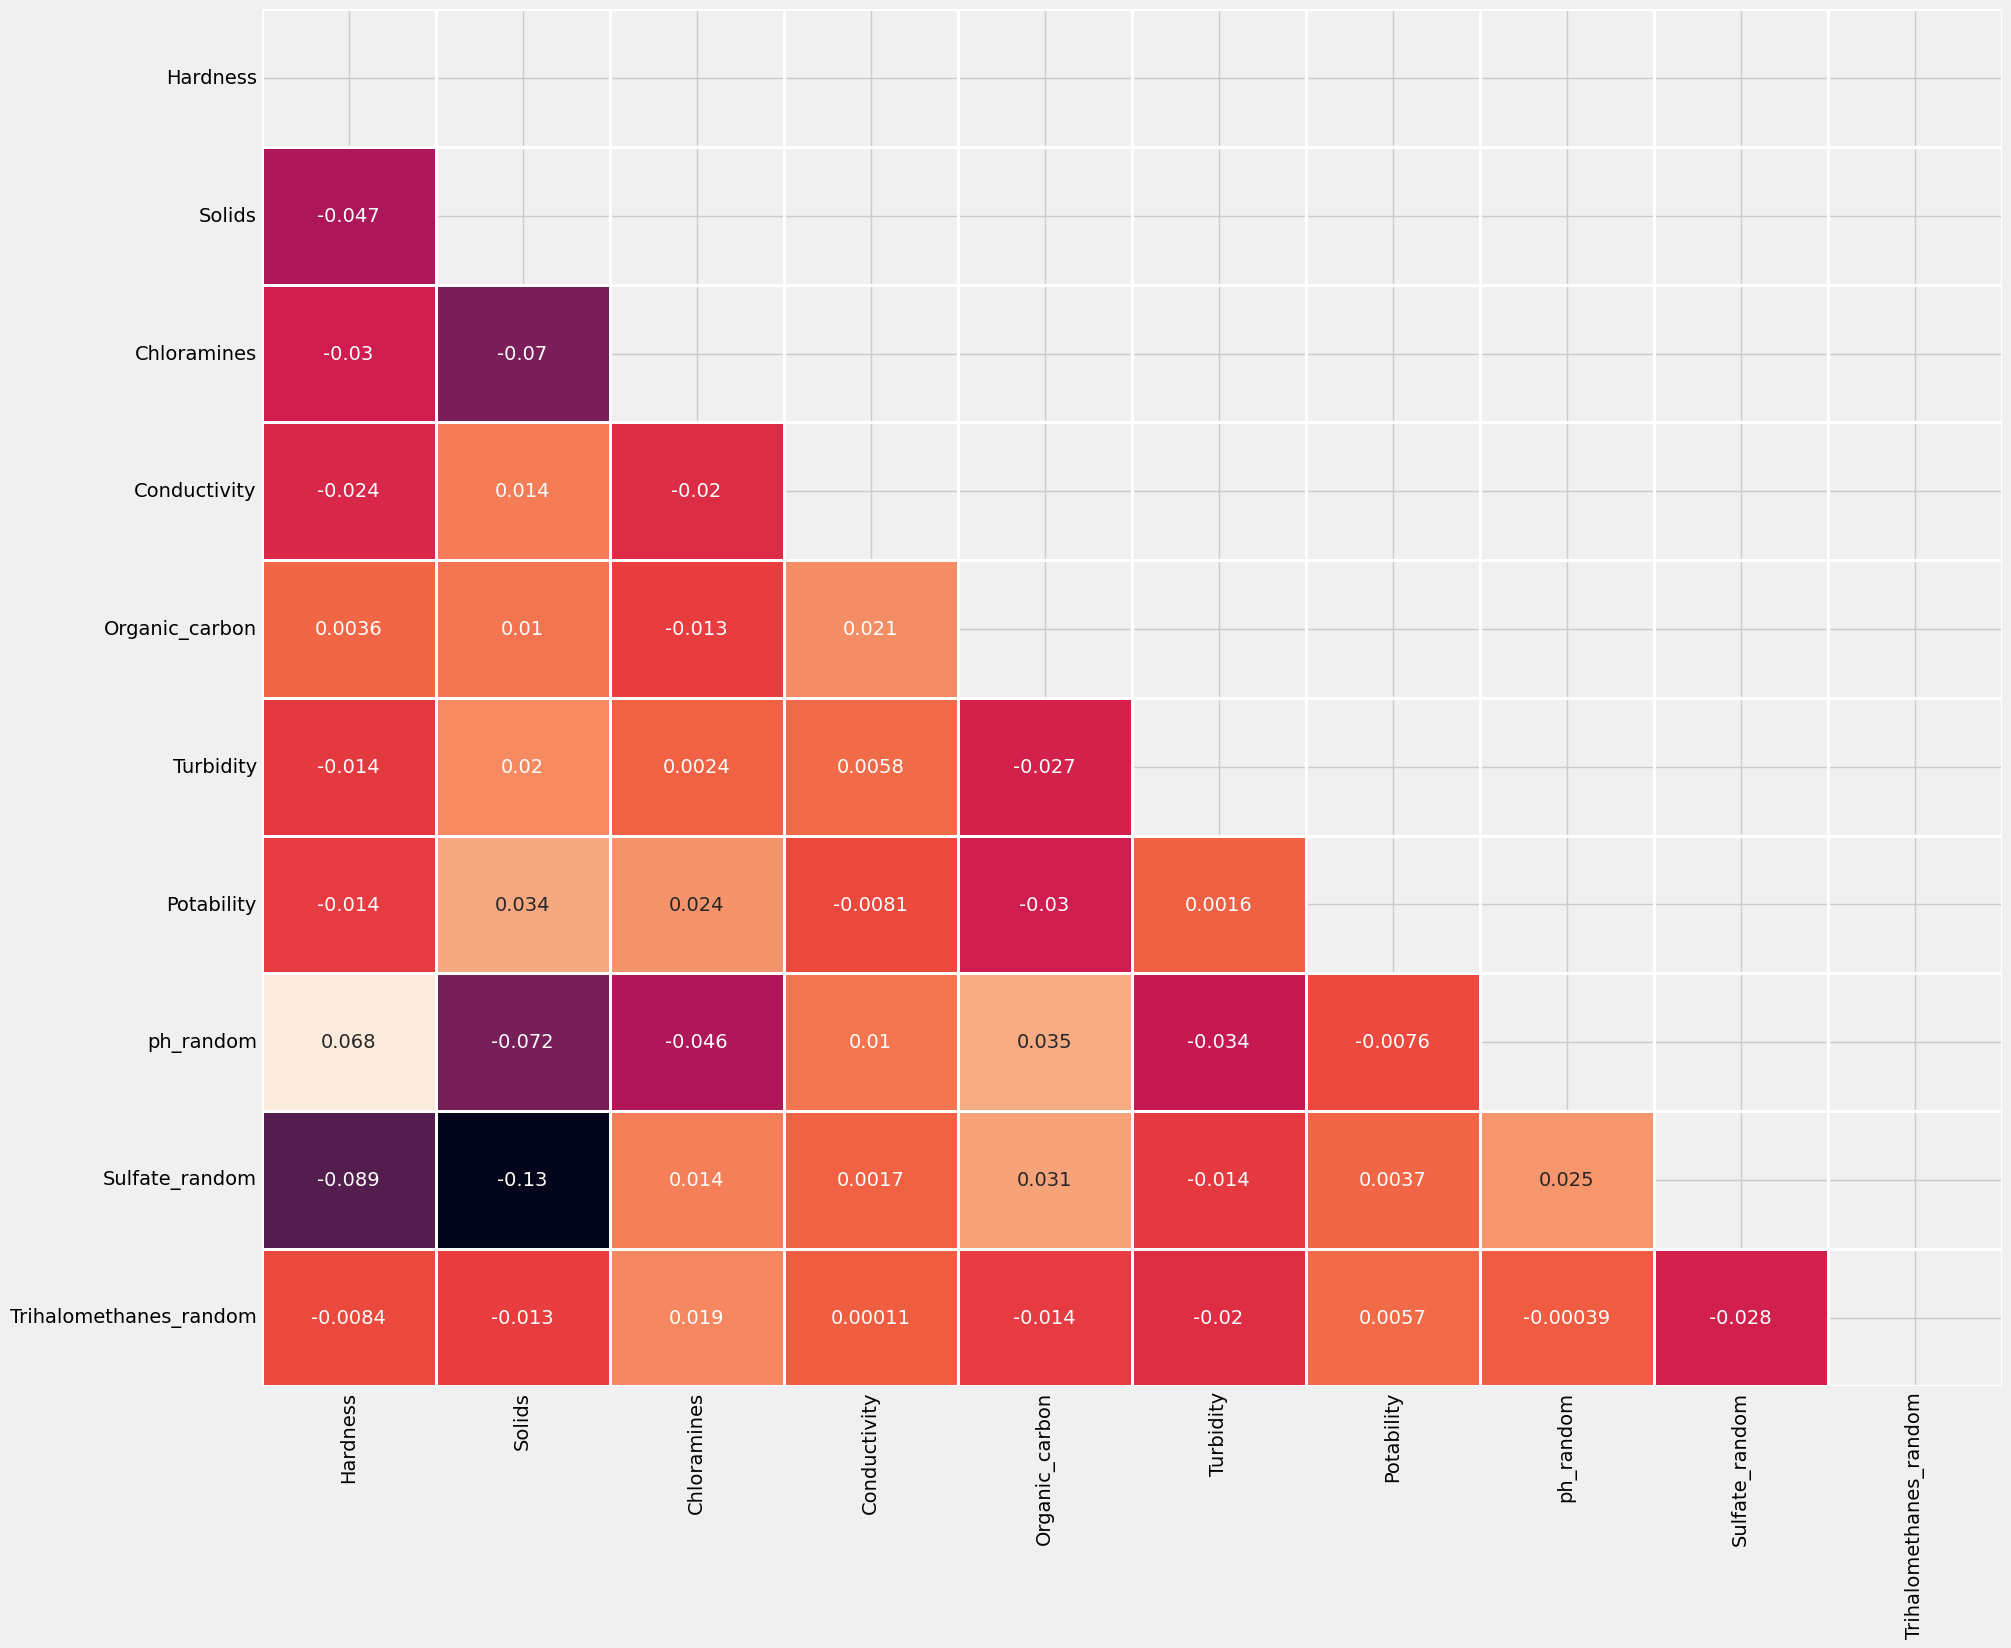

In [27]:
plt.figure(figsize=(20, 17))
matrix = np.triu(data.corr())
sns.heatmap(data.corr(), annot=True,linewidth=.8, mask=matrix, cmap="rocket",cbar=False);

There are no correlated columns presebt in the data

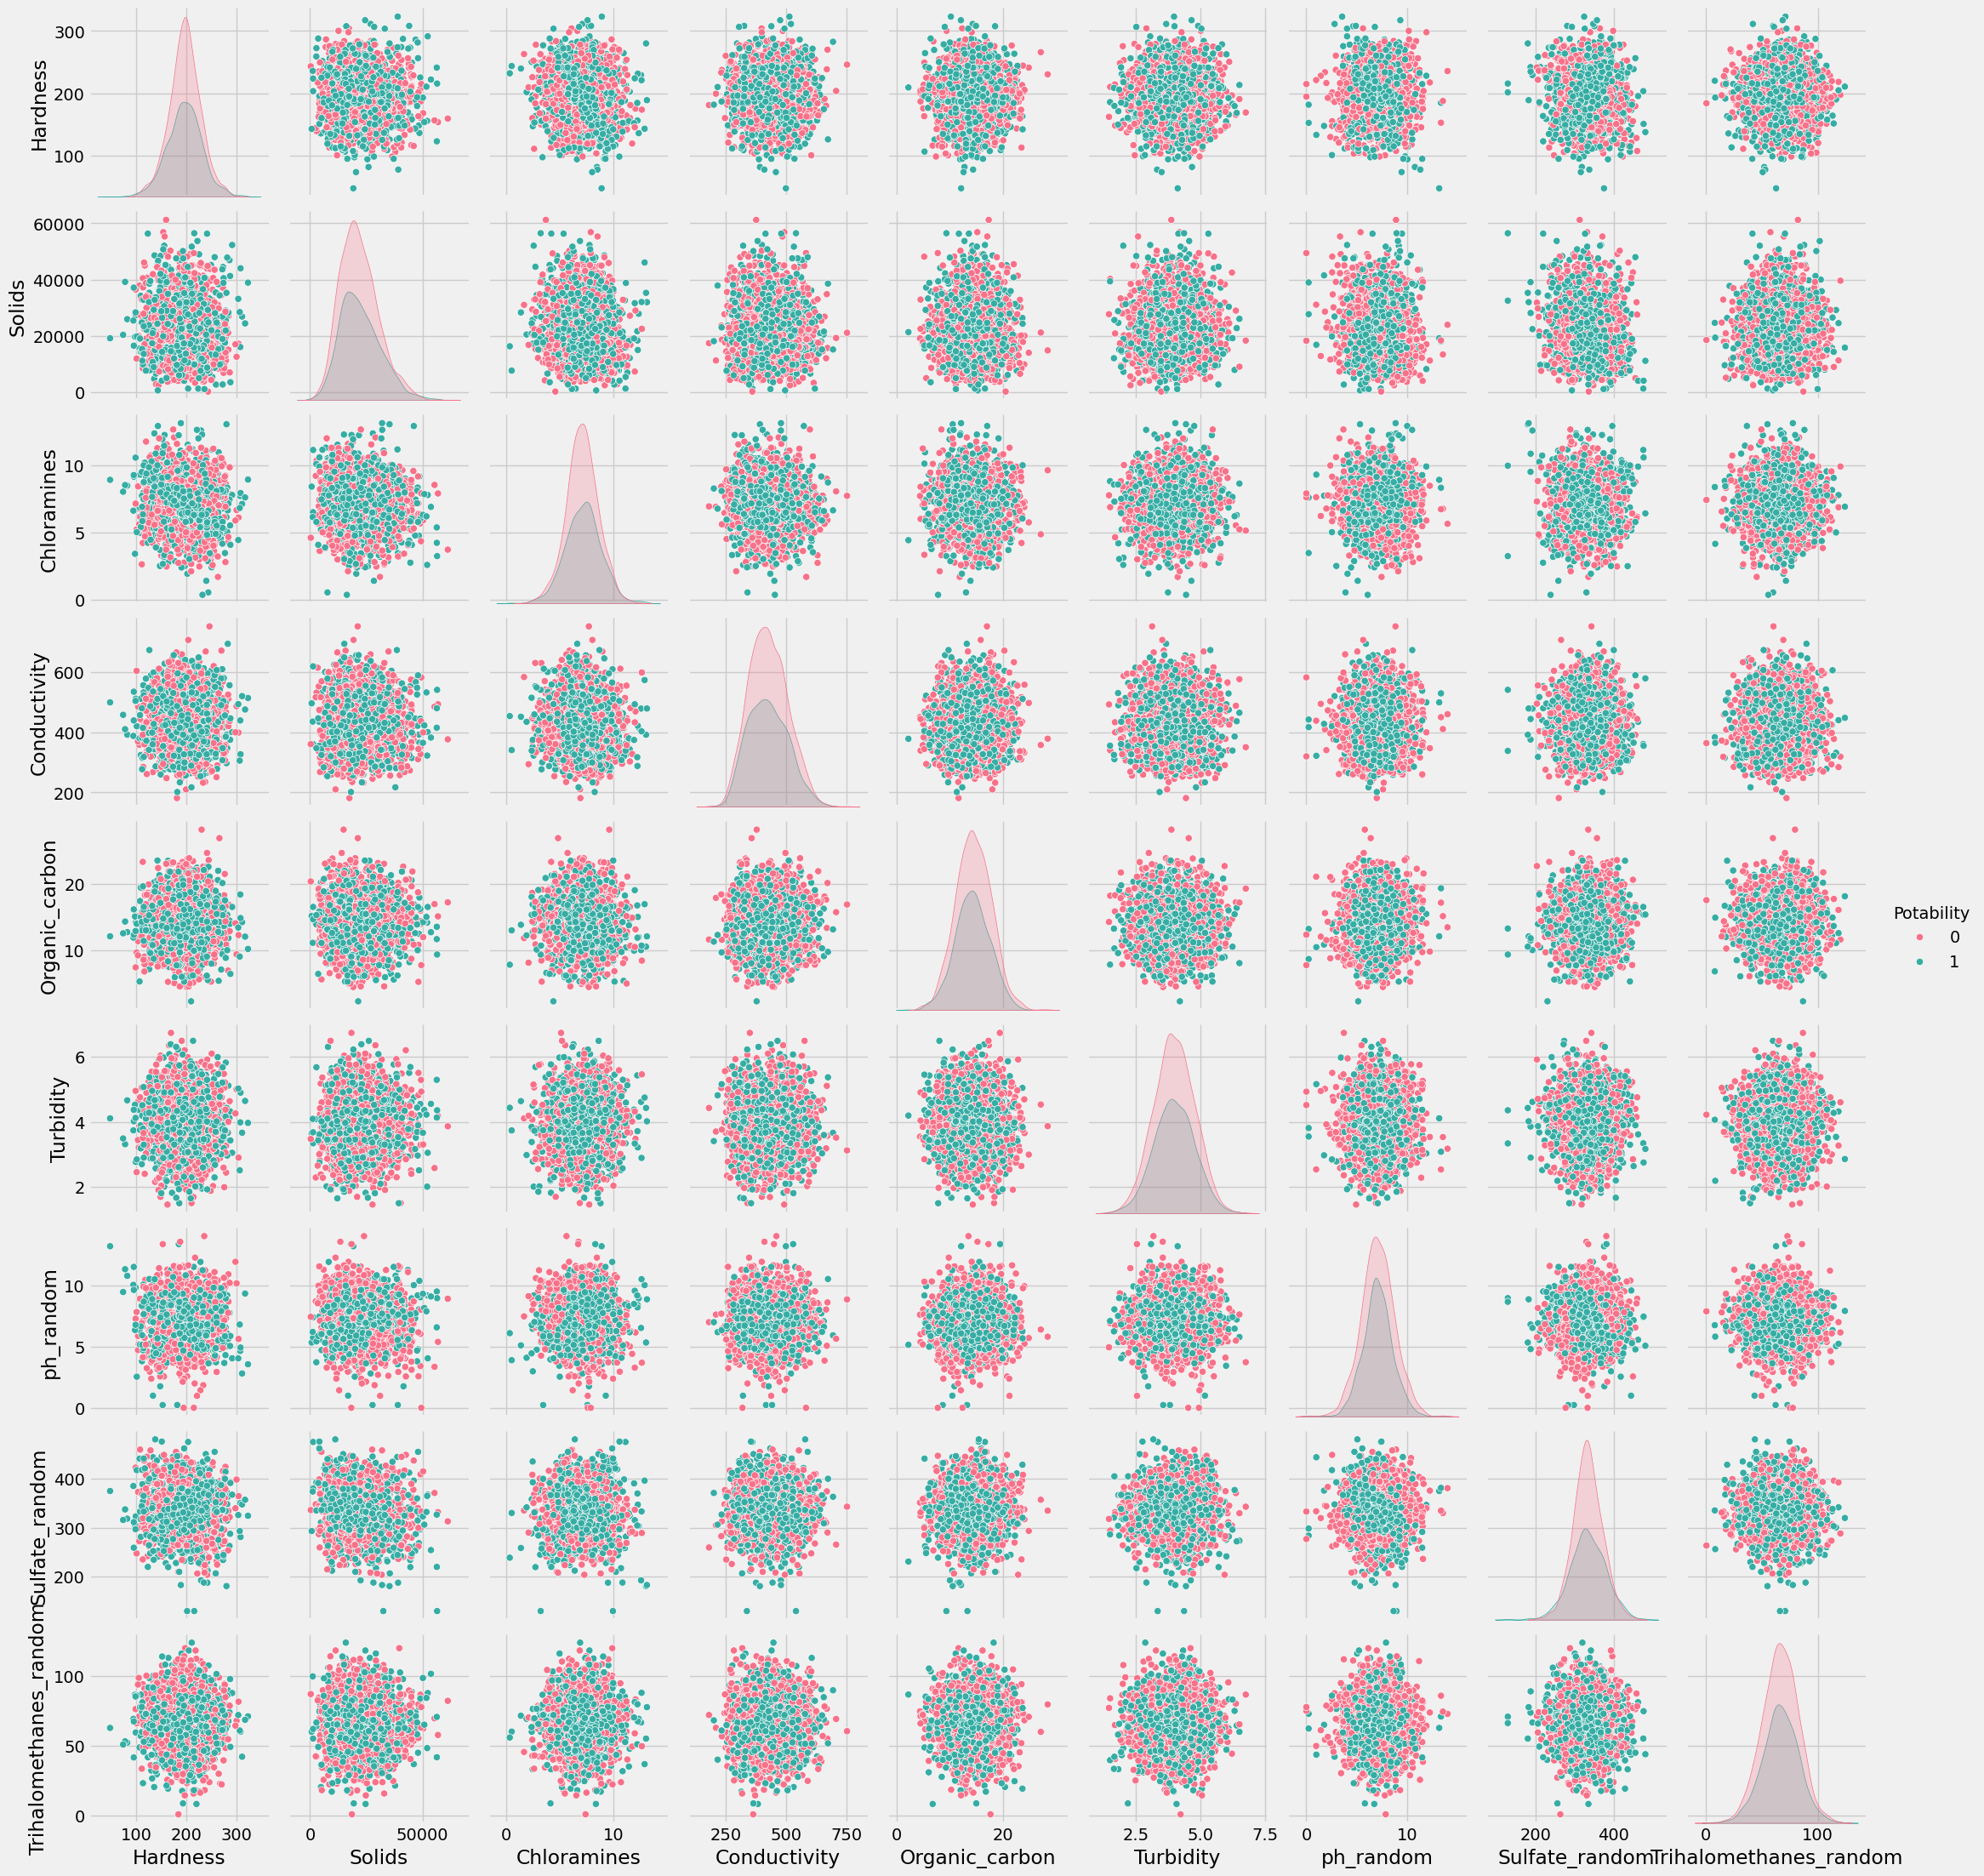

In [28]:
sns.pairplot(data, hue="Potability", palette="husl");

  0%|          | 0/9 [00:00<?, ?it/s]

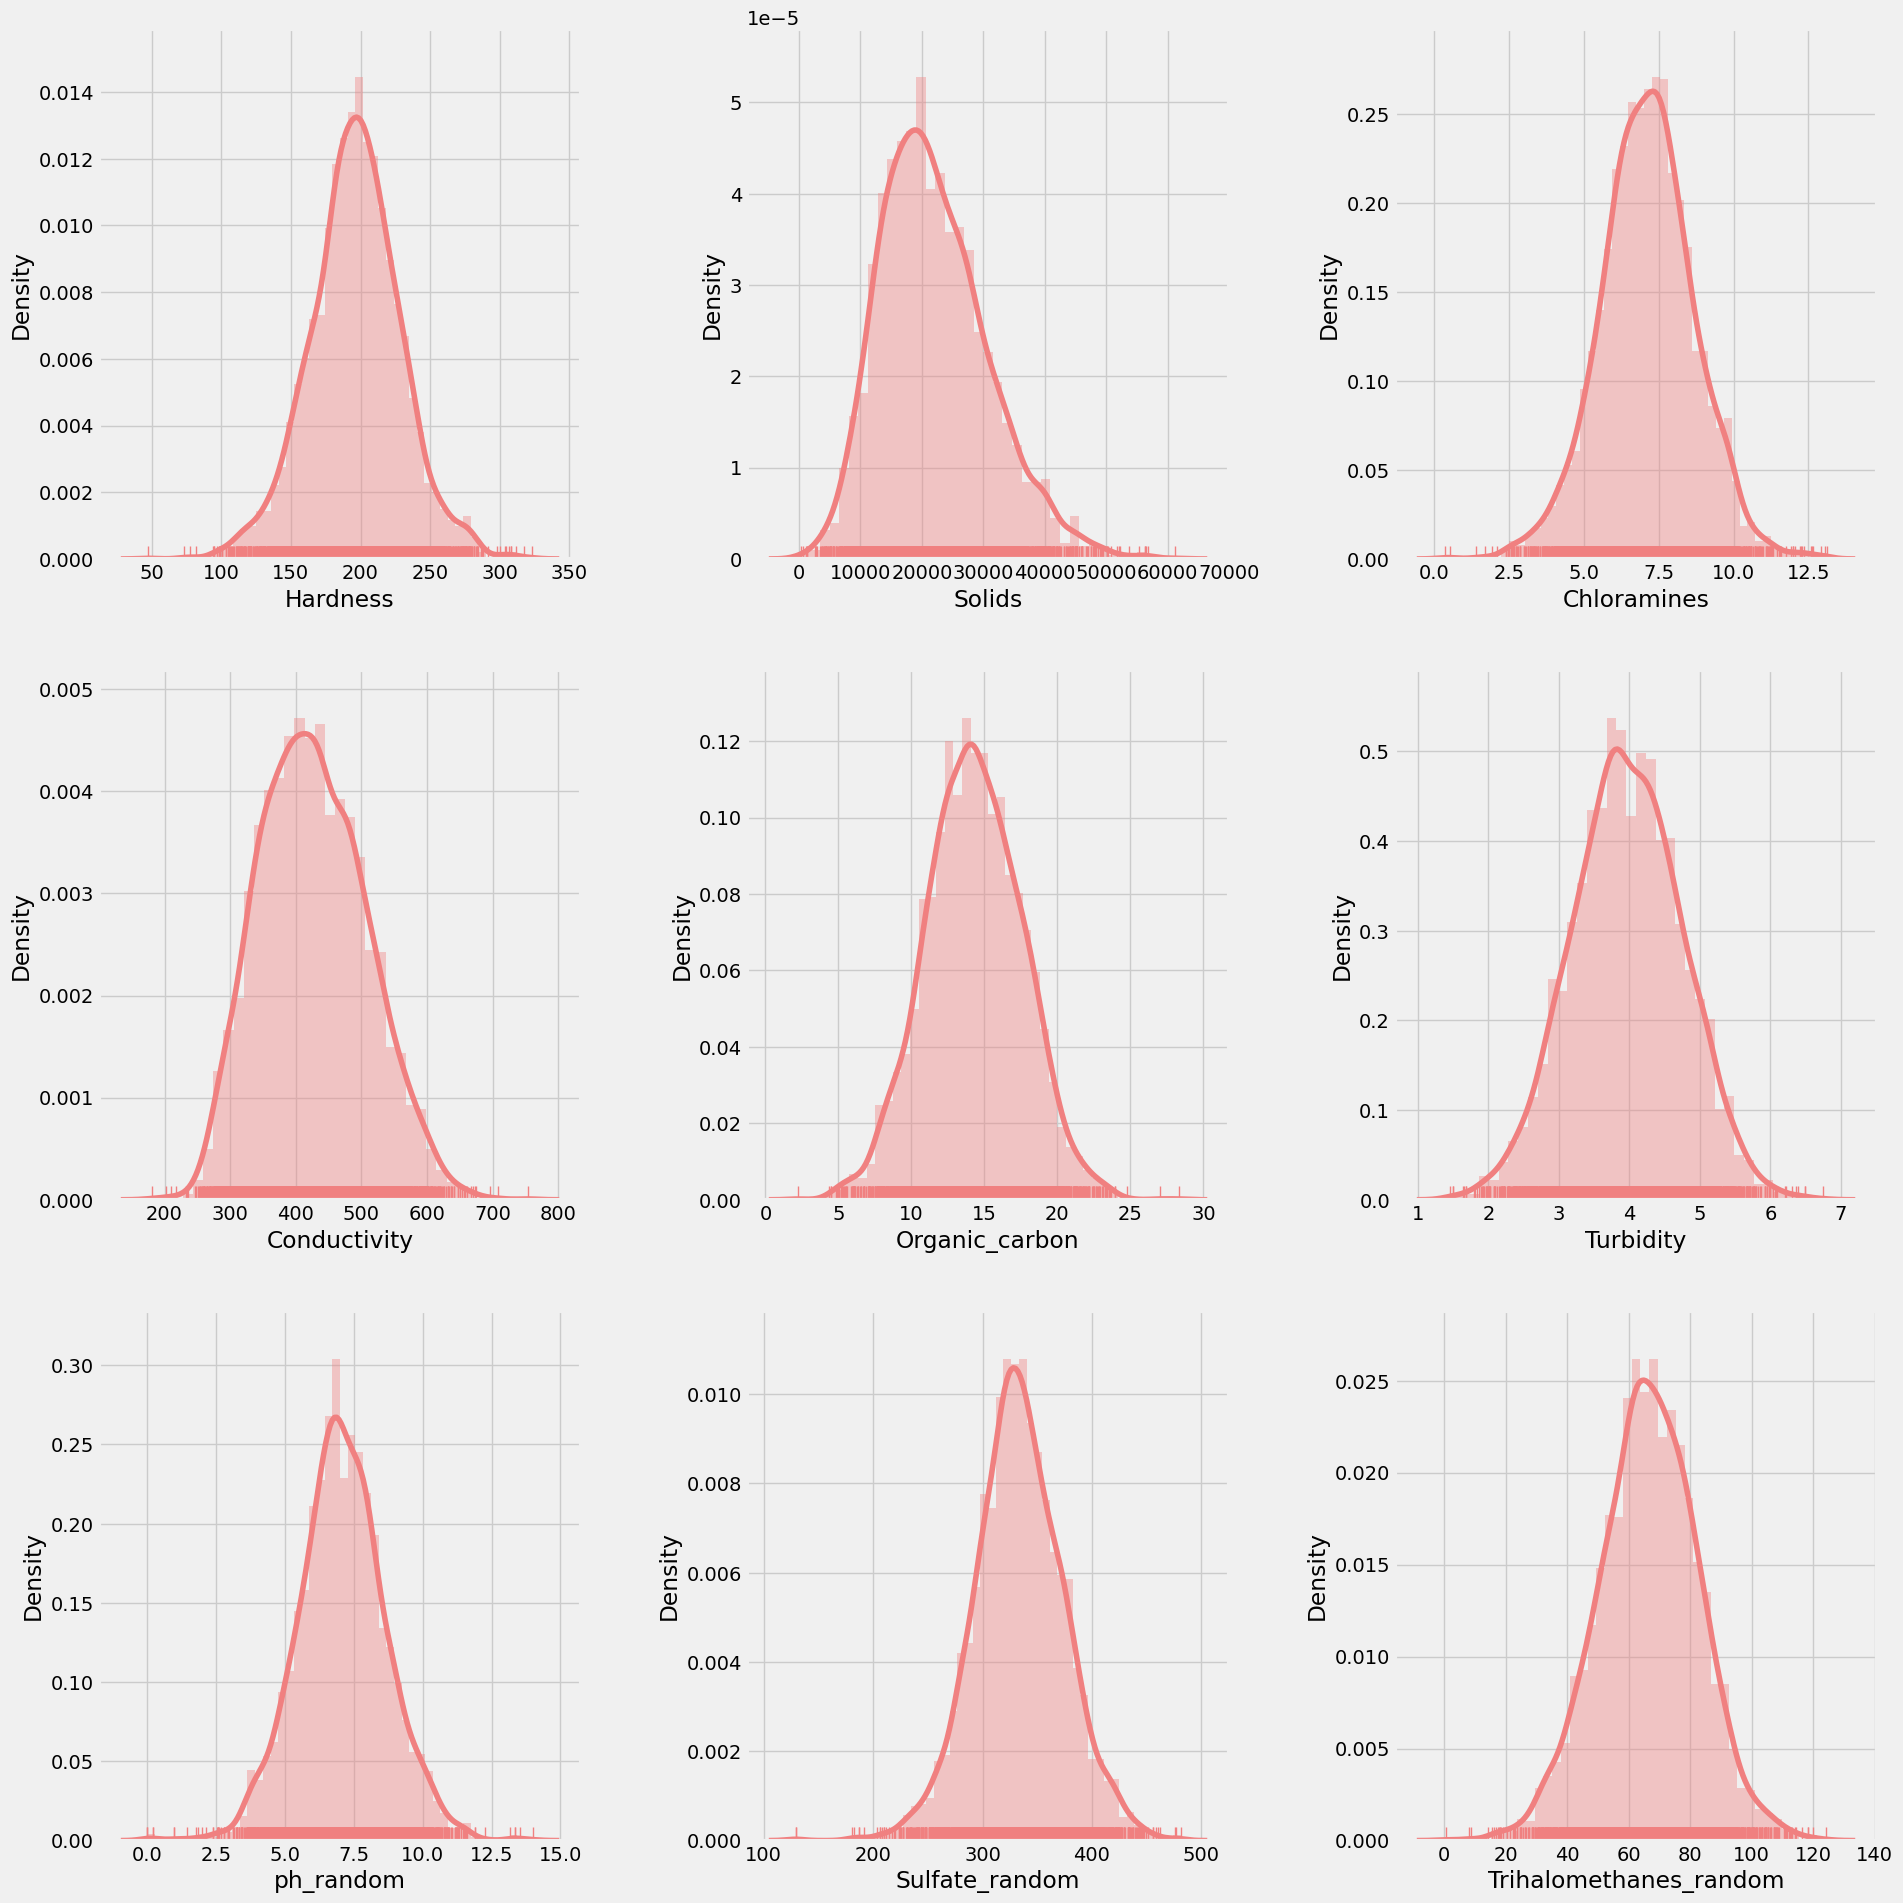

In [31]:
from tqdm.auto import tqdm
def distributionPlot(data):
    """ 
    Creates distribution plot.
    """
    fig = plt.figure(figsize=(20, 20))
    for i in tqdm(range(0, len(data.columns))):
        fig.add_subplot(int(np.ceil(len(data.columns)/3)), 3, i+1)
        sns.distplot(
            data.iloc[:, i], color="lightcoral", rug=True)
        fig.tight_layout(pad=3.0)
plot_data = data.drop(['Potability'], axis =1)
distributionPlot(plot_data)

# Hardness

In [32]:
data['Hardness'].describe()

count    3276.000000
mean      196.369496
std        32.879761
min        47.432000
25%       176.850538
50%       196.967627
75%       216.667456
max       323.124000
Name: Hardness, dtype: float64

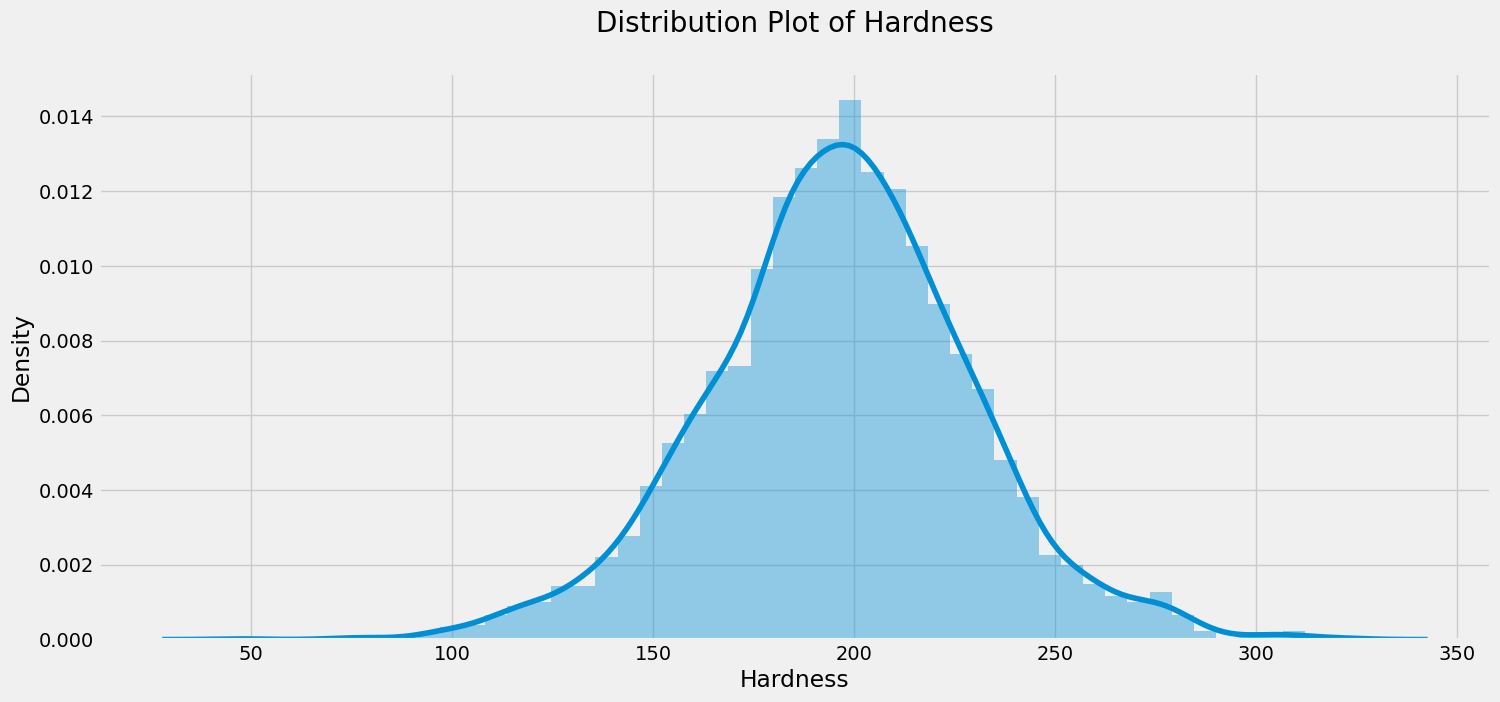

In [33]:
plt.figure(figsize = (16, 7))
sns.distplot(data['Hardness'])
plt.title('Distribution Plot of Hardness\n', fontsize =  20)
plt.show()

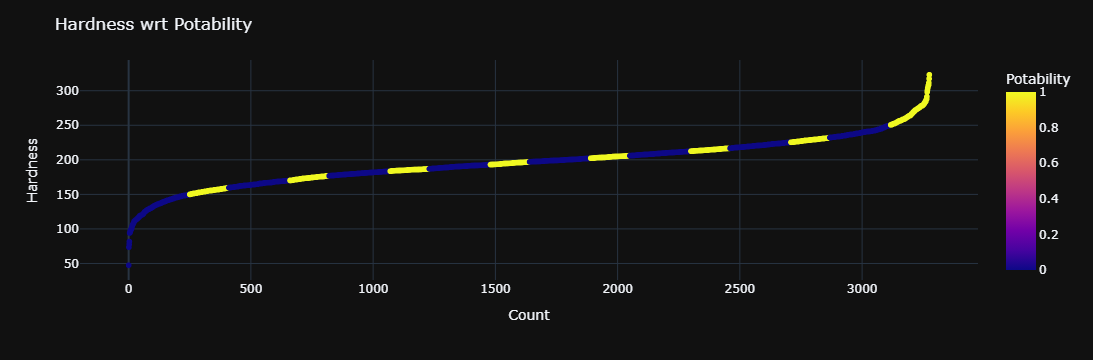

In [34]:
# basic scatter plot
fig = px.scatter(data,range(data['Hardness'].count()), sorted(data['Hardness']),
                 color=data['Potability'],
                 labels={
                     'x': "Count",
                     'y': "Hardness",
                     'color':'Potability'
                     
                 }, template = 'plotly_dark')
fig.update_layout(title='Hardness wrt Potability')
fig.show()

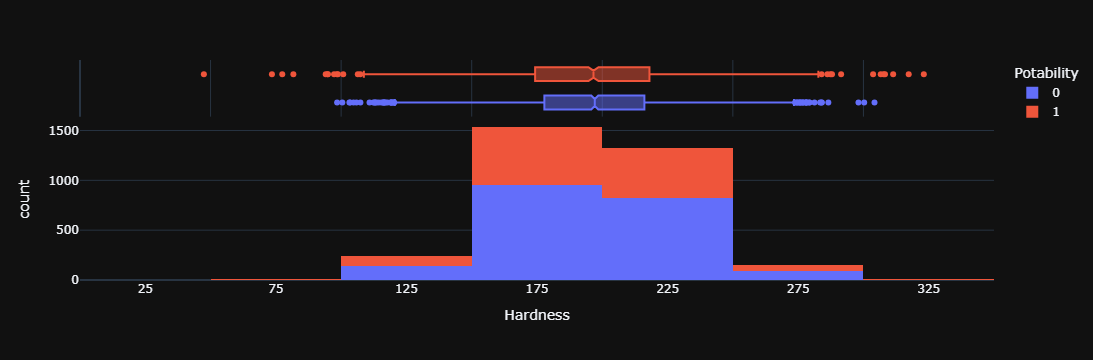

In [35]:
px.histogram(data_frame = data, x = 'Hardness', nbins = 10, color = 'Potability', marginal = 'box',
             template = 'plotly_dark')

# Solids

In [36]:
data['Solids'].describe()

count     3276.000000
mean     22014.092526
std       8768.570828
min        320.942611
25%      15666.690297
50%      20927.833607
75%      27332.762127
max      61227.196008
Name: Solids, dtype: float64

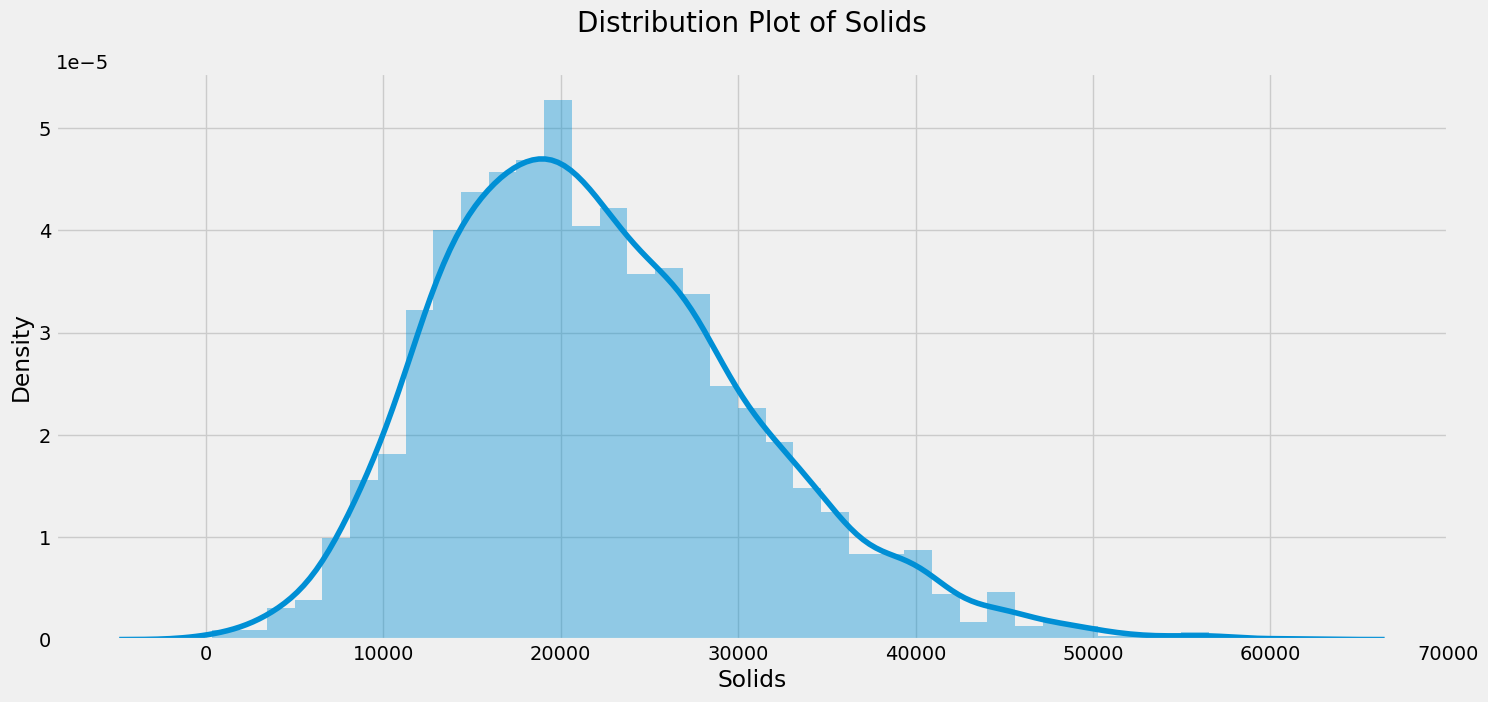

In [37]:
plt.figure(figsize = (16, 7))
sns.distplot(data['Solids'])
plt.title('Distribution Plot of Solids\n', fontsize =  20)
plt.show()

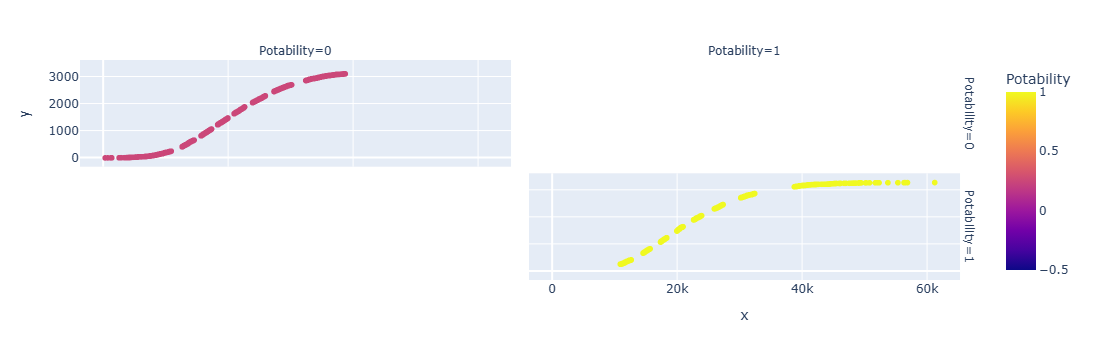

In [38]:
fig = px.scatter(data, sorted(data["Solids"]), range(data["Solids"].count()), color="Potability", facet_col="Potability", 
                 facet_row="Potability")
fig.show()

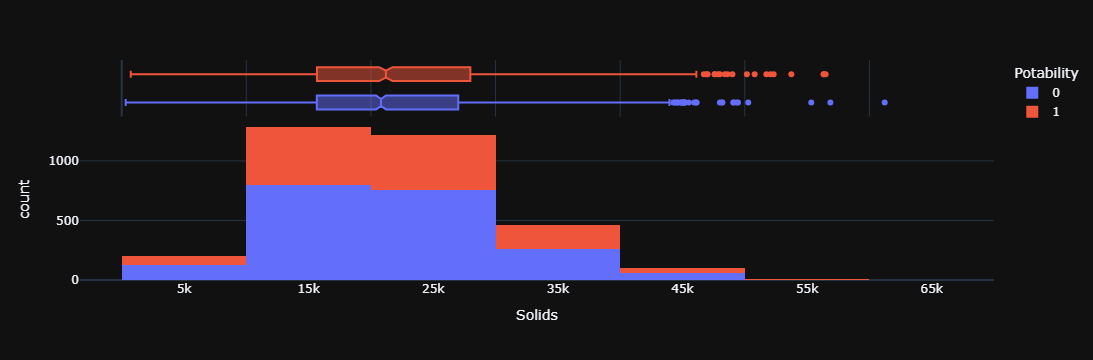

In [39]:
px.histogram(data_frame = data, x = 'Solids', nbins = 10, color = 'Potability', marginal = 'box',
             template = 'plotly_dark')

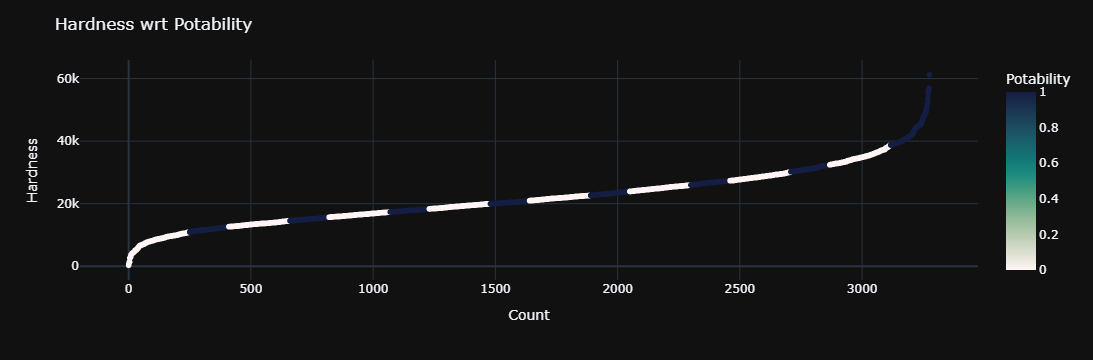

In [40]:
# basic scatter plot
fig = px.scatter(data,range(data['Solids'].count()), sorted(data['Solids']),
                 color=data['Potability'],
                 labels={
                     'x': "Count",
                     'y': "Hardness",
                     'color':'Potability'
                     
                 },
                 color_continuous_scale=px.colors.sequential.tempo,
                 template = 'plotly_dark')
fig.update_layout(title='Hardness wrt Potability')
fig.show()

# Chloramines

In [41]:
data['Chloramines'].describe()

count    3276.000000
mean        7.122277
std         1.583085
min         0.352000
25%         6.127421
50%         7.130299
75%         8.114887
max        13.127000
Name: Chloramines, dtype: float64

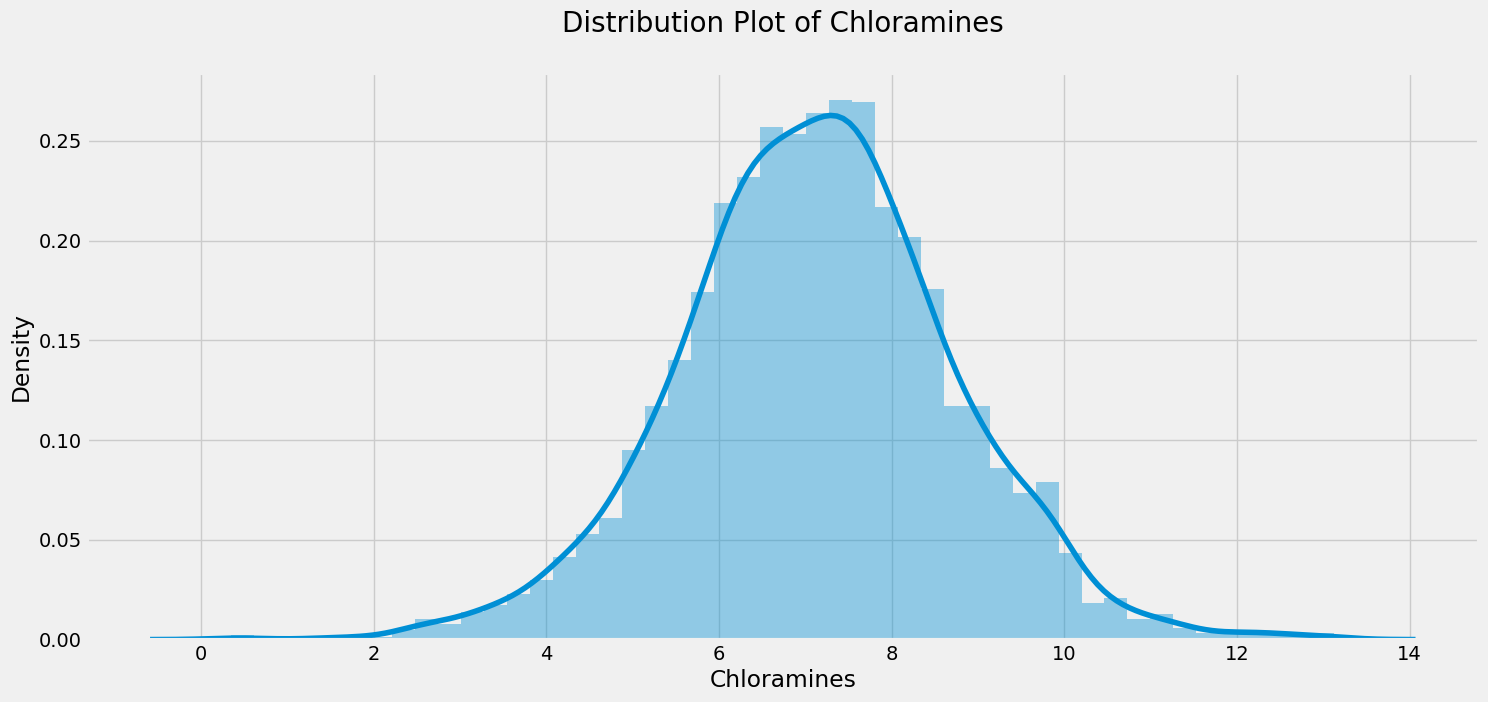

In [42]:
plt.figure(figsize = (16, 7))
sns.distplot(data['Chloramines'])
plt.title('Distribution Plot of Chloramines\n', fontsize =  20)
plt.show()

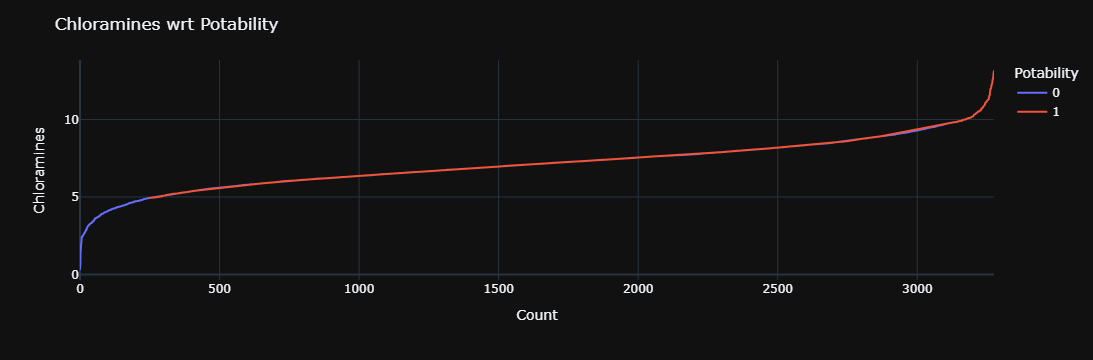

In [43]:
fig = px.line(x=range(data['Chloramines'].count()), y=sorted(data['Chloramines']),color=data['Potability'], labels={
                     'x': "Count",
                     'y': "Chloramines",
                     'color':'Potability'
                     
                 }, template = 'plotly_dark')
fig.update_layout(title='Chloramines wrt Potability')
fig.show()

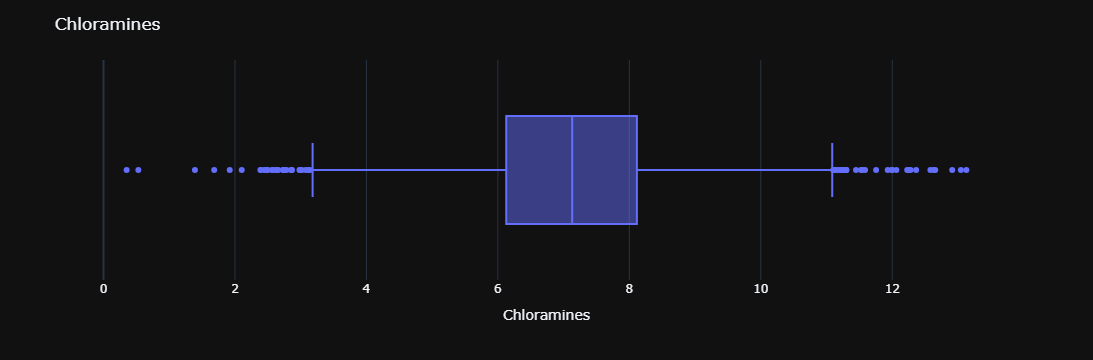

In [44]:
fig = px.box(x = 'Chloramines', data_frame = data, template = 'plotly_dark')
fig.update_layout(title='Chloramines')
fig.show()

# Conductivity

In [45]:
data["Conductivity"].describe()

count    3276.000000
mean      426.205111
std        80.824064
min       181.483754
25%       365.734414
50%       421.884968
75%       481.792304
max       753.342620
Name: Conductivity, dtype: float64

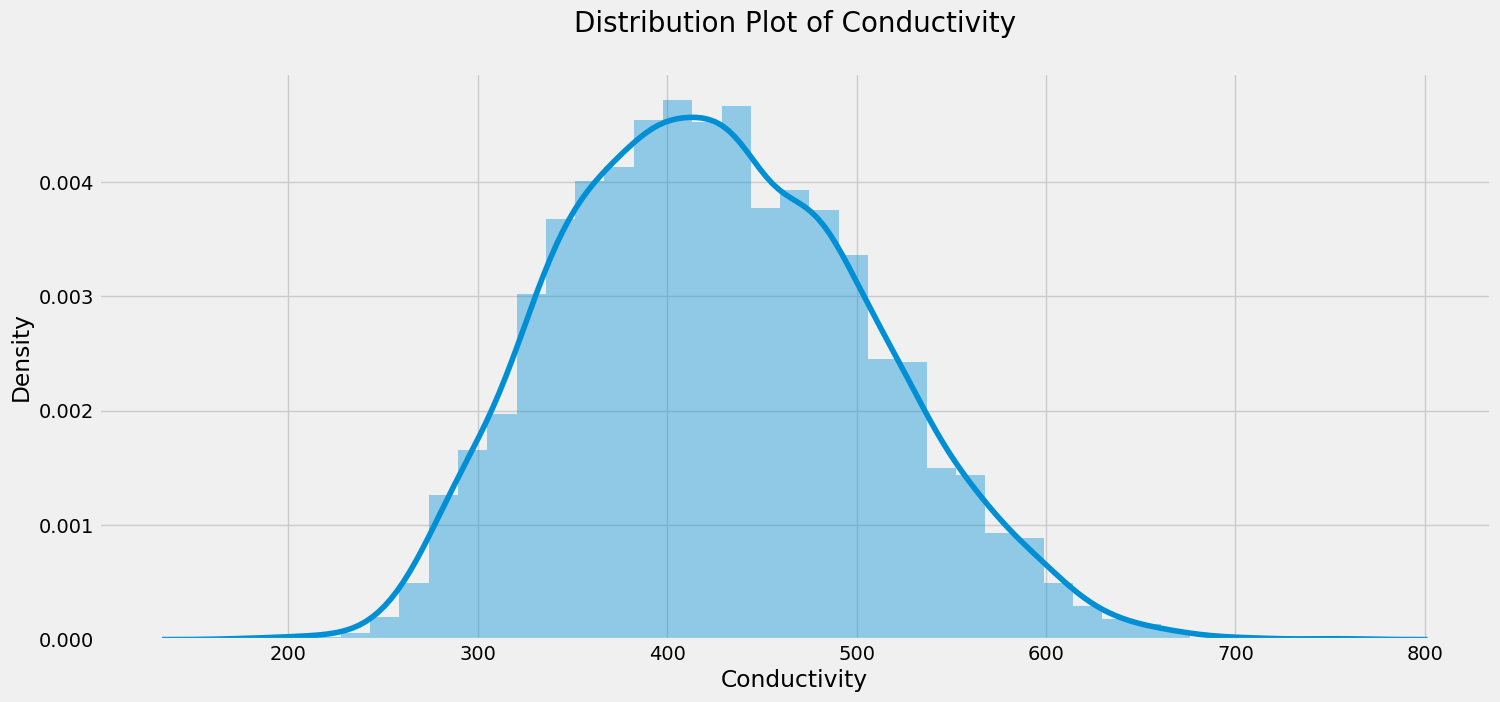

In [46]:
plt.figure(figsize = (16, 7))
sns.distplot(data['Conductivity'])
plt.title('Distribution Plot of Conductivity\n', fontsize =  20)
plt.show()

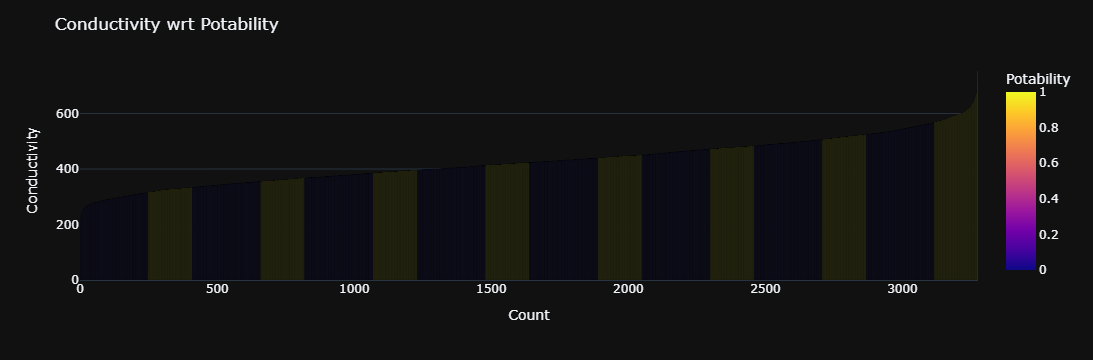

In [47]:
fig = px.bar(data, x=range(data['Conductivity'].count()),
             y=sorted(data['Conductivity']), labels={
                     'x': "Count",
                     'y': "Conductivity",
                     'color':'Potability'
                     
                 },
             color=data['Potability']
             ,template = 'plotly_dark')
fig.update_layout(title='Conductivity wrt Potability')
fig.show() 

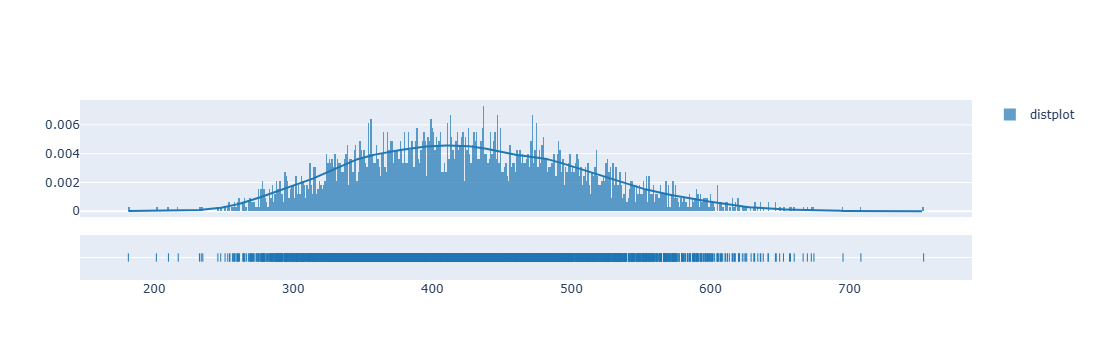

In [48]:

group_labels = ['distplot'] # name of the dataset

fig = ff.create_distplot([data['Conductivity']], group_labels)
fig.show()

# Organic_carbon

In [49]:
data['Organic_carbon'].describe()

count    3276.000000
mean       14.284970
std         3.308162
min         2.200000
25%        12.065801
50%        14.218338
75%        16.557652
max        28.300000
Name: Organic_carbon, dtype: float64

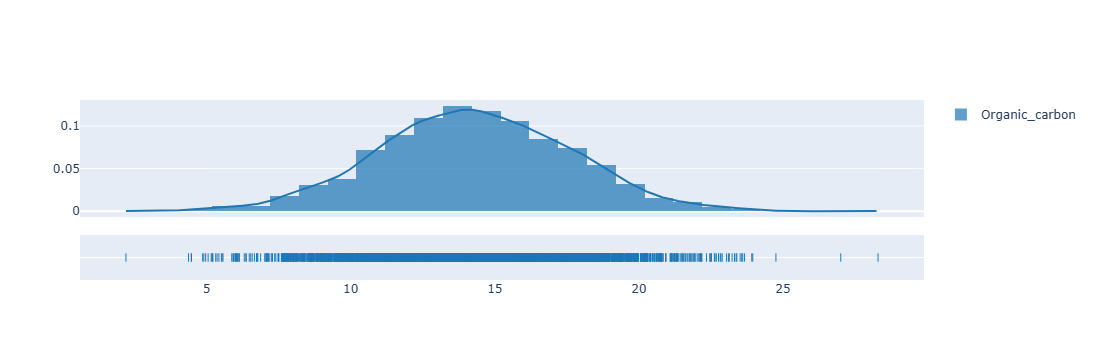

In [50]:

group_labels = ['Organic_carbon'] # name of the dataset

fig = ff.create_distplot([data['Organic_carbon']], group_labels)
fig.show()

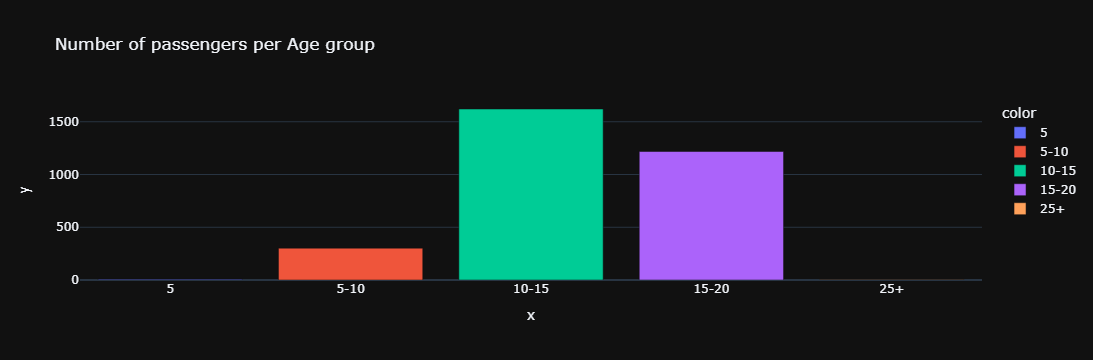

In [51]:
dt_5=data[data['Organic_carbon']<5]
dt_5_10=data[(data['Organic_carbon']>5)&(data['Organic_carbon']<10)]
dt_10_15=data[(data['Organic_carbon']>10)&(data['Organic_carbon']<15)]
dt_15_20=data[(data['Organic_carbon']>15)&(data['Organic_carbon']<20)]
dt_20_25=data[(data['Organic_carbon']>20)&(data['Organic_carbon']<25)]
dt_25=data[(data['Organic_carbon']>25)]

x_Age = ['5', '5-10', '10-15', '15-20', '25+']
y_Age = [len(dt_5.values), len(dt_5_10.values), len(dt_10_15.values), len(dt_15_20.values),
     len(dt_25.values)]

px.bar(data_frame = data, x = x_Age, y = y_Age, color = x_Age, template = 'plotly_dark',
       title = 'Number of passengers per Age group')

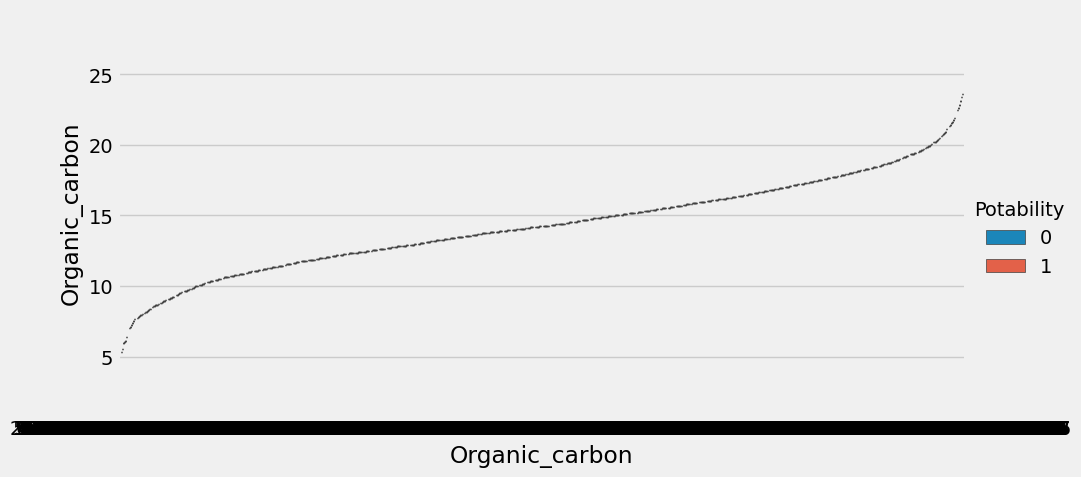

In [52]:
sns.catplot(x = 'Organic_carbon', y = 'Organic_carbon', hue = 'Potability', data = data, kind = 'box',
            height = 5, aspect = 2)
plt.show()

# Turbidity

In [53]:
data['Turbidity'].describe()

count    3276.000000
mean        3.966786
std         0.780382
min         1.450000
25%         3.439711
50%         3.955028
75%         4.500320
max         6.739000
Name: Turbidity, dtype: float64

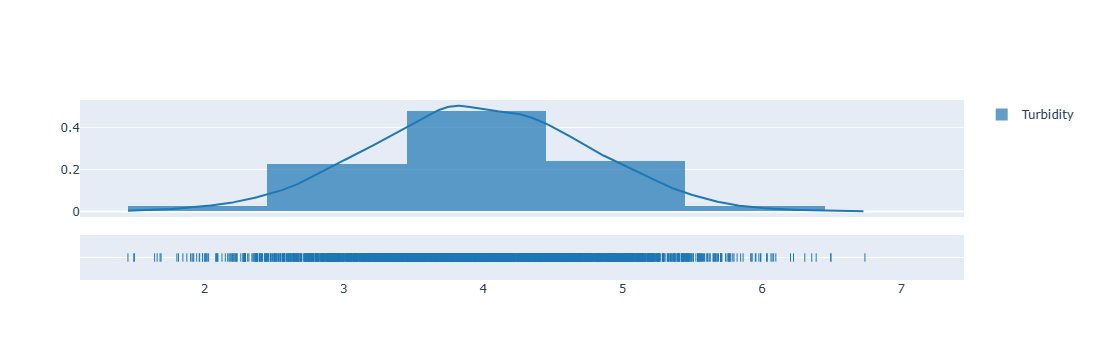

In [55]:

group_labels = ['Turbidity'] # name of the dataset

fig = ff.create_distplot([data['Turbidity']], group_labels)
fig.show()

In [56]:
data['turbid_class']=data['Turbidity'].astype(int)

In [57]:
data['turbid_class'].unique()

array([2, 4, 3, 5, 6, 1])

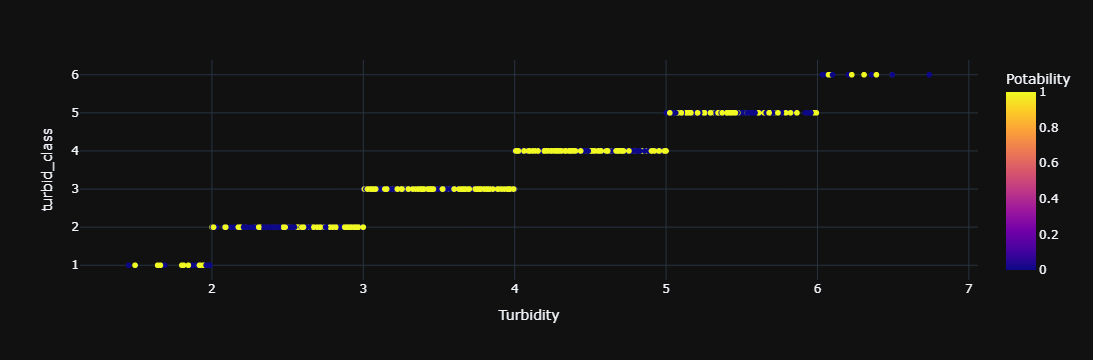

In [58]:
px.scatter(data_frame = data, x = 'Turbidity', y = 'turbid_class', color = 'Potability', template = 'plotly_dark')

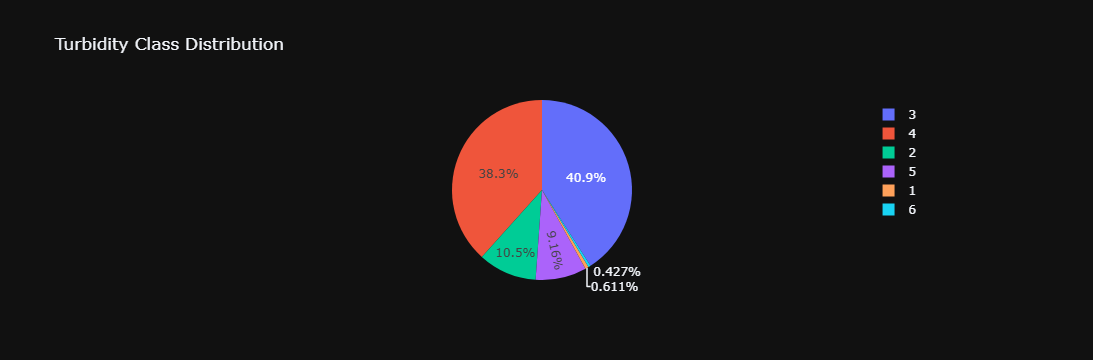

In [67]:
fig = px.pie(
    names = data['turbid_class'].value_counts().index,
    values = data['turbid_class'].value_counts().values,
    title = "Turbidity Class Distribution"
)

fig.update_layout(template='plotly_dark')
fig.show()


In [68]:
data=data.drop(['turbid_class'],axis=1)

# ph_random

In [69]:
data['ph_random'].describe()

count    3276.000000
mean        7.071639
std         1.607991
min         0.000000
25%         6.081460
50%         7.029490
75%         8.063147
max        14.000000
Name: ph_random, dtype: float64

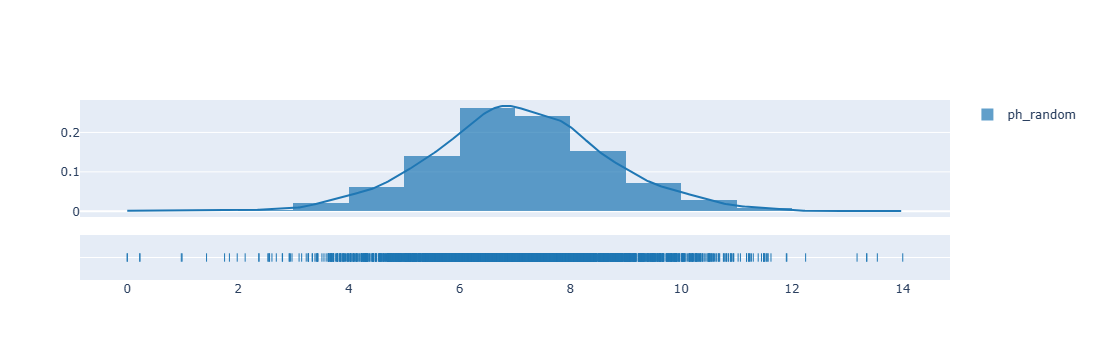

In [70]:

group_labels = ['ph_random'] # name of the dataset

fig = ff.create_distplot([data['ph_random']], group_labels)
fig.show()

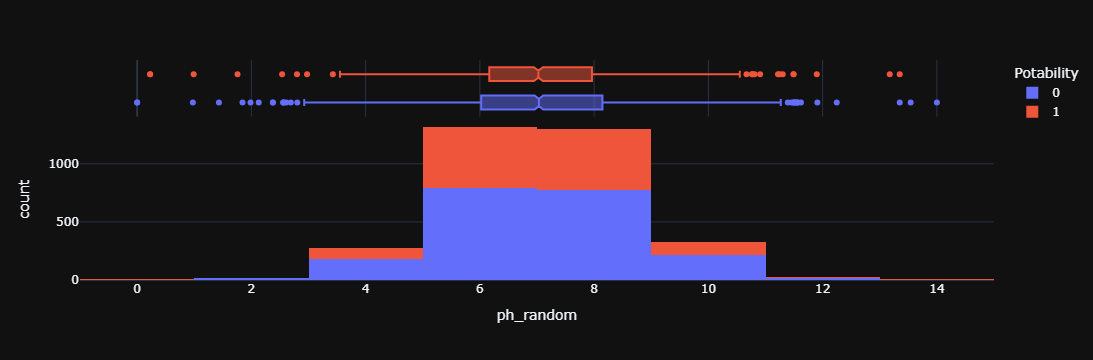

In [71]:
px.histogram(data_frame = data, x = 'ph_random', nbins = 10, color = 'Potability', marginal = 'box',
             template = 'plotly_dark')

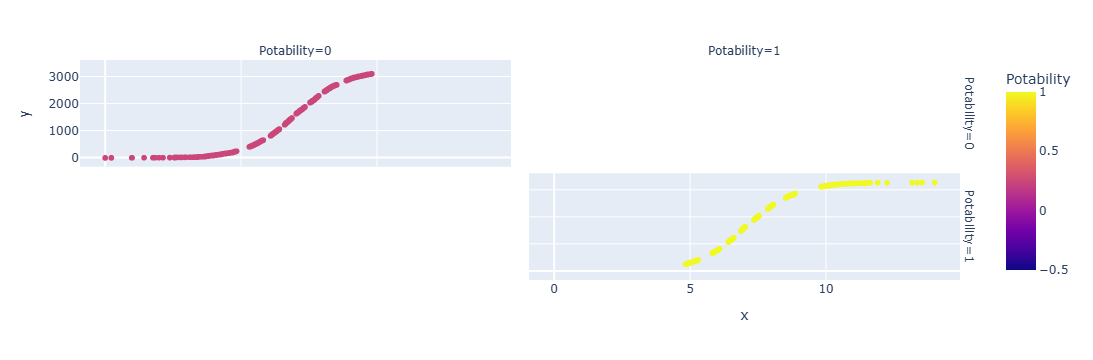

In [72]:
fig = px.scatter(data, sorted(data["ph_random"]), range(data["ph_random"].count()), color="Potability", facet_col="Potability", 
                 facet_row="Potability")
fig.show()

# Sulfate_random

In [73]:
data['Sulfate_random'].describe()

count    3276.000000
mean      333.430954
std        41.026947
min       129.000000
25%       307.523159
50%       332.879578
75%       359.710517
max       481.030642
Name: Sulfate_random, dtype: float64

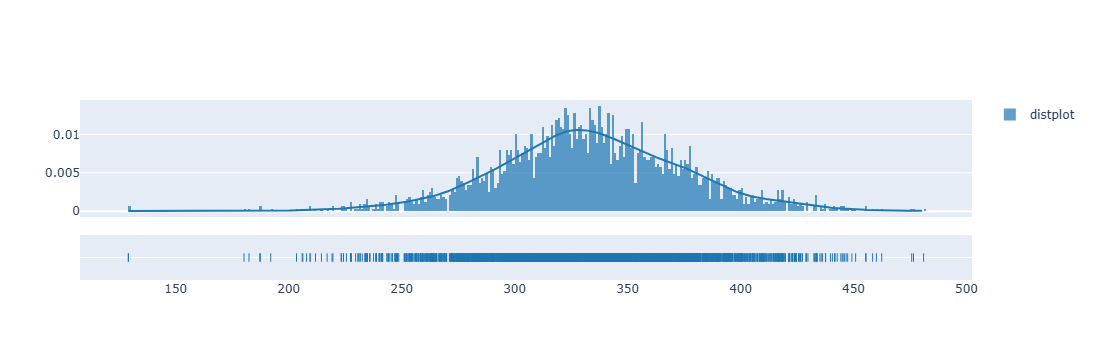

In [74]:
group_labels = ['distplot'] # name of the dataset

fig = ff.create_distplot([data['Sulfate_random']], group_labels)
fig.show()

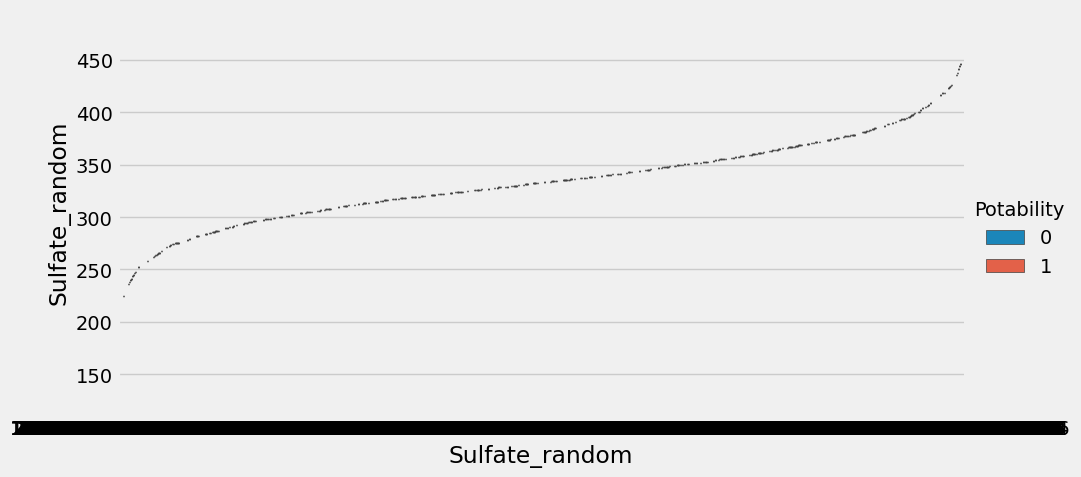

In [75]:
sns.catplot(x = 'Sulfate_random', y = 'Sulfate_random', hue = 'Potability', data = data, kind = 'box',
            height = 5, aspect = 2)
plt.show()

# Trihalomethanes_random

In [76]:
data['Trihalomethanes_random'].describe()

count    3276.000000
mean       66.419200
std        16.184832
min         0.738000
25%        55.861675
50%        66.639068
75%        77.384166
max       124.000000
Name: Trihalomethanes_random, dtype: float64

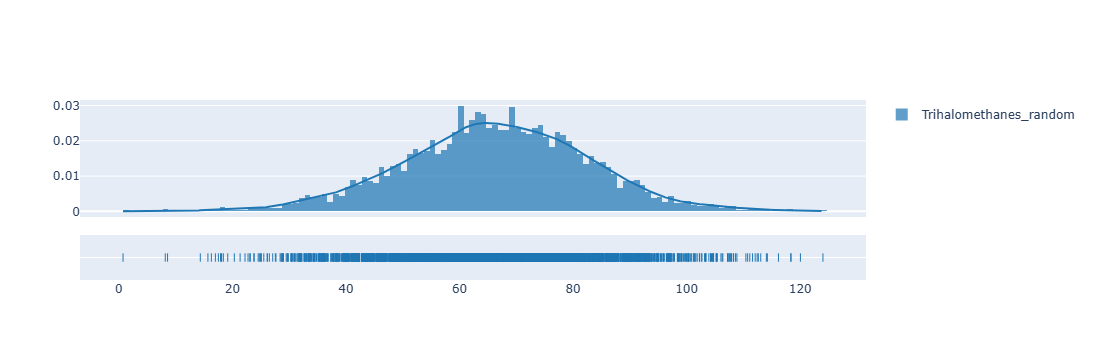

In [77]:

group_labels = ['Trihalomethanes_random'] # name of the dataset

fig = ff.create_distplot([data['Trihalomethanes_random']], group_labels)
fig.show()

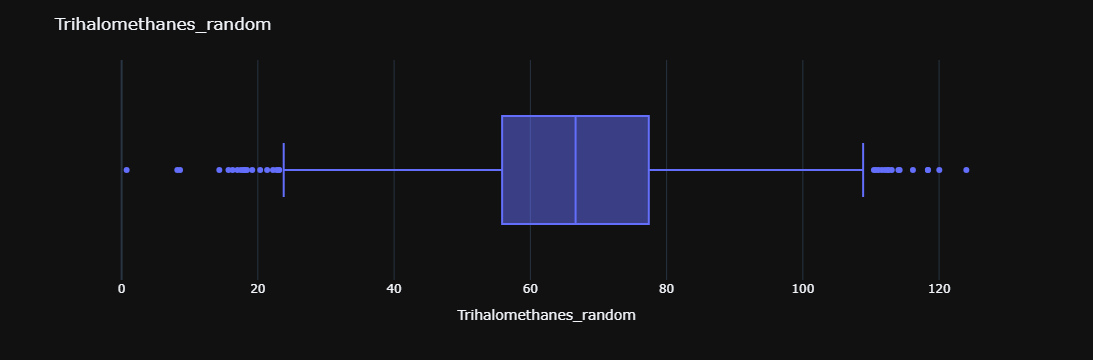

In [78]:
fig = px.box(x = 'Trihalomethanes_random', data_frame = data, template = 'plotly_dark')
fig.update_layout(title='Trihalomethanes_random')
fig.show()

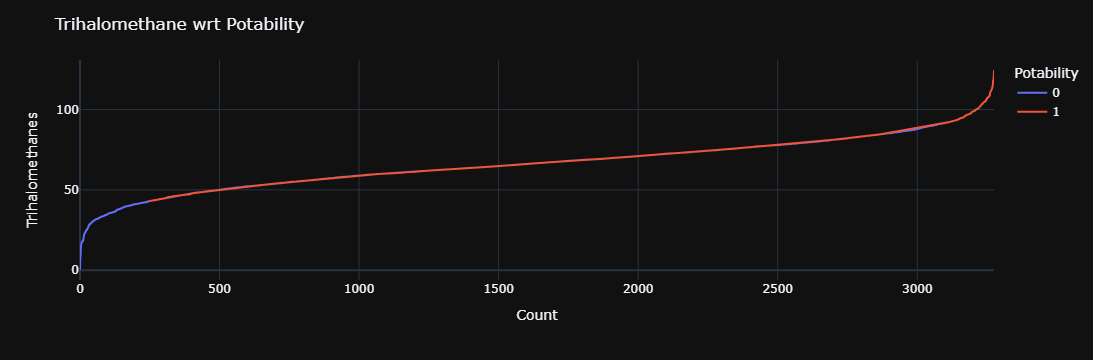

In [79]:
fig = px.line(x=range(data['Trihalomethanes_random'].count()), y=sorted(data['Trihalomethanes_random']),color=data['Potability'], labels={
                     'x': "Count",
                     'y': "Trihalomethanes",
                     'color':'Potability'
                     
                 }, template = 'plotly_dark')
fig.update_layout(title='Trihalomethane wrt Potability')
fig.show()

# Potability

In [80]:
data['Potability'].describe()

count    3276.000000
mean        0.390110
std         0.487849
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Potability, dtype: float64

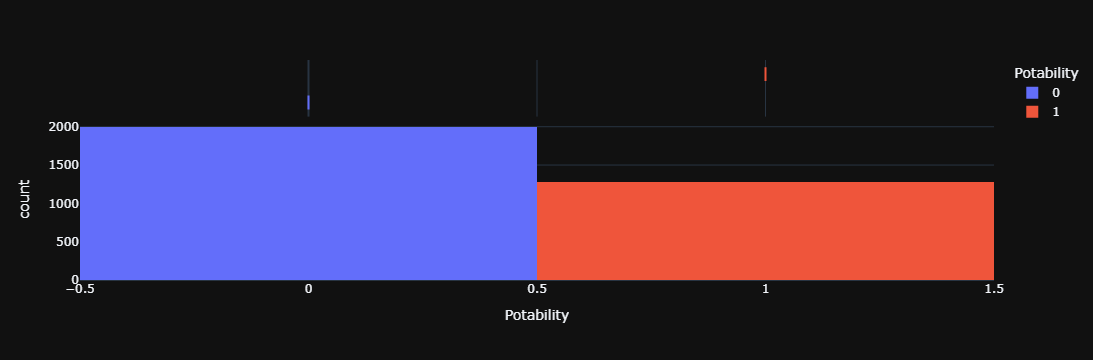

In [81]:
px.histogram(data_frame = data, x = 'Potability', color = 'Potability', marginal = 'box',
             template = 'plotly_dark')

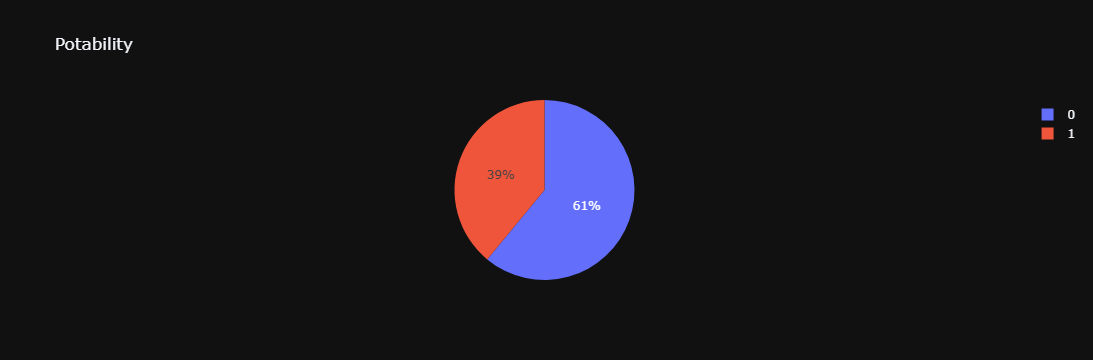

In [84]:
counts = data['Potability'].value_counts()

fig = px.pie(
    names = counts.index,
    values = counts.values,
    title = 'Potability',
    template = 'plotly_dark'
)

fig.show()


# Data Preprocessing

In [87]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [88]:
X=data.drop(['Potability'],axis=1)
y=data['Potability']

Since the data is not in a uniform shape, we scale the data using standard scalar

In [89]:
scaler = StandardScaler()
x=scaler.fit_transform(X)

In [90]:
# split the data to train and test set
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.85,random_state=42)


print("training data shape:-{} labels{} ".format(x_train.shape,y_train.shape))
print("testing data shape:-{} labels{} ".format(x_test.shape,y_test.shape))

training data shape:-(2784, 9) labels(2784,) 
testing data shape:-(492, 9) labels(492,) 


# Modeling

### Logistic Regression

In [117]:
import numpy as np

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic Regression from scratch
class LogisticRegression:
    def __init__(self, lr=0.01, epochs=2000):
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)

        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient Descent
        for _ in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = sigmoid(linear_model)

            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        X = np.array(X)
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_model)
        return np.where(y_pred > 0.5, 1, 0)

# Train
model = LogisticRegression(lr=0.01, epochs=2000)
model.fit(x_train, y_train)

# Predict
y_pred = model.predict(x_test)

# Accuracy
accuracy = np.mean(y_pred == y_test)
print(accuracy)


0.6219512195121951


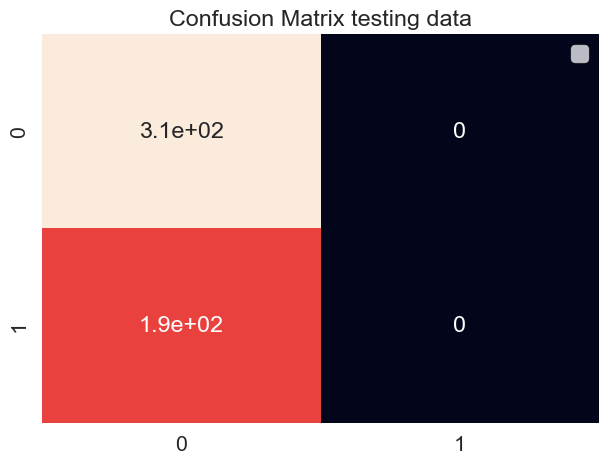

In [118]:
#  Confusion matrix
from sklearn.metrics import confusion_matrix
# Make Predictions
pred1=log.predict(np.array(x_test))
plt.title("Confusion Matrix testing data")
sns.heatmap(confusion_matrix(y_test,pred1),annot=True,cbar=False)
plt.legend()
plt.show()

### K Nearest Neighbours

In [120]:
import numpy as np

# Euclidean distance
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b)**2))

# KNN Classifier 
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)

    def predict_one(self, x):
        # Compute all distances
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]

        # Get indices of k nearest points
        k_idx = np.argsort(distances)[:self.k]

        # Get labels of k neighbors
        k_labels = self.y_train[k_idx]

        # Majority vote
        values, counts = np.unique(k_labels, return_counts=True)
        return values[np.argmax(counts)]

    def predict(self, X):
        return np.array([self.predict_one(x) for x in X])

# Train
knn = KNN(k=2)
knn.fit(x_train, y_train)

# Predict
predicted = knn.predict(x_test)

# Accuracy
knn_accuracy = np.mean(predicted == y_test)
print(knn_accuracy)


0.6199186991869918


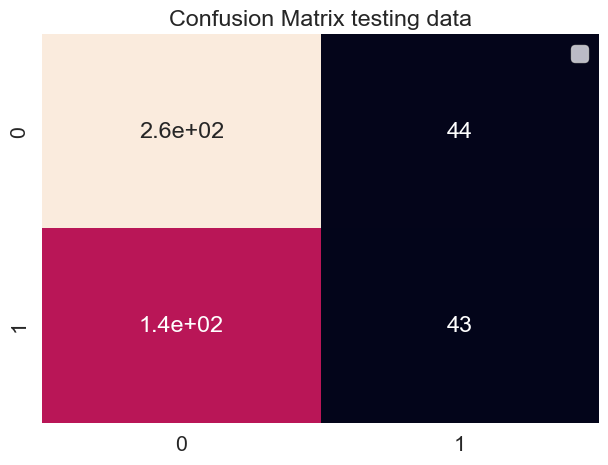

In [121]:
#  Confusion matrix
from sklearn.metrics import confusion_matrix
# Make Predictions
pred1=knn.predict(np.array(x_test))
plt.title("Confusion Matrix testing data")
sns.heatmap(confusion_matrix(y_test,pred1),annot=True,cbar=False)
plt.legend()
plt.show()

### SVM

In [130]:
import numpy as np

class SVM:
    def __init__(self, lr=0.001, epochs=2000, lambda_param=0.01):
        self.lr = lr
        self.epochs = epochs
        self.lambda_param = lambda_param  # regularization strength

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)

        # Convert labels: SVM expects -1 and +1
        y = np.where(y <= 0, -1, 1)

        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        # Gradient Descent
        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.w) + self.b) >= 1

                if condition:
                    # Correct classification → only regularization
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    # Misclassified → update weight and bias
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y[idx]))
                    self.b -= self.lr * y[idx]

    def predict(self, X):
        X = np.array(X)
        linear_output = np.dot(X, self.w) + self.b
        return np.where(linear_output >= 0, 1, 0)  # return 0/1 labels
        

# Train
svm_model = SVM(lr=0.001, epochs=2000, lambda_param=0.01)
svm_model.fit(x_train, y_train)

# Predict
y_pred = svm_model.predict(x_test)

# Accuracy
svm_accuracy = np.mean(y_pred == y_test)
print(svm_accuracy)


0.3780487804878049


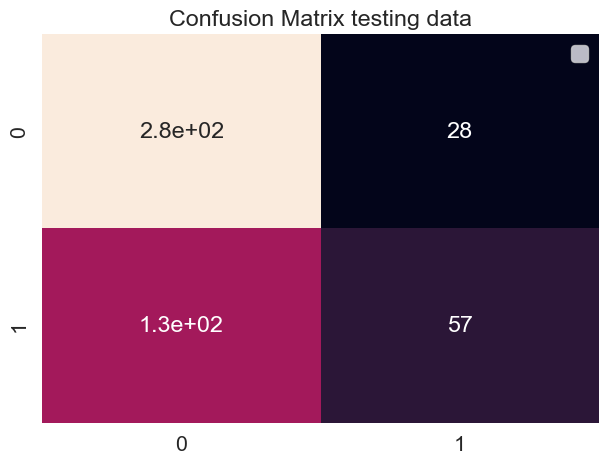

In [124]:
#  Confusion matrix
from sklearn.metrics import confusion_matrix
# Make Predictions
pred1=svmc.predict(np.array(x_test))
plt.title("Confusion Matrix testing data")
sns.heatmap(confusion_matrix(y_test,pred1),annot=True,cbar=False)
plt.legend()
plt.show()

### Decision Tree

In [127]:
import numpy as np


def gini(y):
    classes, counts = np.unique(y, return_counts=True)
    prob = counts / counts.sum()
    return 1 - np.sum(prob ** 2)


def split_dataset(X, y, feature, threshold):
    left_idx = X[:, feature] <= threshold
    right_idx = X[:, feature] > threshold

    return X[left_idx], y[left_idx], X[right_idx], y[right_idx]


def best_split(X, y):
    best_feature = None
    best_threshold = None
    best_gini = 1e9

    n_features = X.shape[1]

    for feature in range(n_features):
        thresholds = np.unique(X[:, feature])

        for t in thresholds:
            X_left, y_left, X_right, y_right = split_dataset(X, y, feature, t)

            if len(y_left) == 0 or len(y_right) == 0:
                continue

            gini_left = gini(y_left)
            gini_right = gini(y_right)

            weighted_gini = (len(y_left)/len(y)) * gini_left + (len(y_right)/len(y)) * gini_right

            if weighted_gini < best_gini:
                best_gini = weighted_gini
                best_feature = feature
                best_threshold = t

    return best_feature, best_threshold

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value  # leaf node prediction


class DecisionTree:
    def __init__(self, max_depth=10):
        self.max_depth = max_depth
        self.root = None

    def build_tree(self, X, y, depth):
        # Stopping conditions
        if depth >= self.max_depth or len(np.unique(y)) == 1:
            majority = np.bincount(y).argmax()
            return Node(value=majority)

        feature, threshold = best_split(X, y)

        if feature is None:
            majority = np.bincount(y).argmax()
            return Node(value=majority)

        X_left, y_left, X_right, y_right = split_dataset(X, y, feature, threshold)

        # Recursively build tree
        left_child = self.build_tree(X_left, y_left, depth + 1)
        right_child = self.build_tree(X_right, y_right, depth + 1)

        return Node(feature, threshold, left_child, right_child)

    def fit(self, X, y):
        self.root = self.build_tree(np.array(X), np.array(y), 0)

    def predict_one(self, x, node):
        if node.value is not None:
            return node.value

        if x[node.feature] <= node.threshold:
            return self.predict_one(x, node.left)
        else:
            return self.predict_one(x, node.right)

    def predict(self, X):
        return np.array([self.predict_one(x, self.root) for x in X])


tree_model = DecisionTree(max_depth=6)
tree_model.fit(x_train, y_train)

y_pred = tree_model.predict(x_test)

accuracy = np.mean(y_pred == y_test)
accuracy


np.float64(0.6178861788617886)

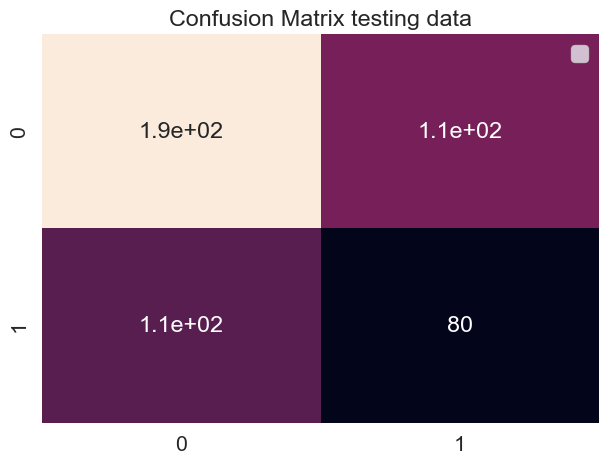

In [128]:
#  Confusion matrix
from sklearn.metrics import confusion_matrix
# Make Predictions
pred1=tre.predict(np.array(x_test))
plt.title("Confusion Matrix testing data")
sns.heatmap(confusion_matrix(y_test,pred1),annot=True,cbar=False)
plt.legend()
plt.show()

### Random Forest

In [132]:
import numpy as np

# -----------------------------
# FIX REQUIRED BEFORE TRAINING:
# -----------------------------
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
# -----------------------------

def gini(y):
    classes, counts = np.unique(y, return_counts=True)
    prob = counts / counts.sum()
    return 1 - np.sum(prob**2)


def split_dataset(X, y, feature, threshold):
    left_idx = X[:, feature] <= threshold
    right_idx = X[:, feature] > threshold
    return X[left_idx], y[left_idx], X[right_idx], y[right_idx]


def best_split(X, y, features):
    best_feature, best_threshold = None, None
    best_gini = 1e9

    for feature in features:
        thresholds = np.unique(X[:, feature])

        for t in thresholds:
            X_l, y_l, X_r, y_r = split_dataset(X, y, feature, t)

            if len(y_l) == 0 or len(y_r) == 0:
                continue

            g_l, g_r = gini(y_l), gini(y_r)
            weighted_gini = (len(y_l)/len(y))*g_l + (len(y_r)/len(y))*g_r

            if weighted_gini < best_gini:
                best_gini = weighted_gini
                best_feature = feature
                best_threshold = t

    return best_feature, best_threshold


class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value


class DecisionTree:
    def __init__(self, max_depth=10, max_features=None):
        self.max_depth = max_depth
        self.max_features = max_features

    def build(self, X, y, depth=0):
        if depth >= self.max_depth or len(np.unique(y)) == 1:
            leaf_value = np.bincount(y).argmax()
            return Node(value=leaf_value)

        n_features = X.shape[1]
        features = np.random.choice(n_features, self.max_features, replace=False)

        feat, thresh = best_split(X, y, features)
        if feat is None:
            leaf_value = np.bincount(y).argmax()
            return Node(value=leaf_value)

        X_l, y_l, X_r, y_r = split_dataset(X, y, feat, thresh)

        left = self.build(X_l, y_l, depth + 1)
        right = self.build(X_r, y_r, depth + 1)

        return Node(feature=feat, threshold=thresh, left=left, right=right)

    def fit(self, X, y):
        self.root = self.build(np.array(X), np.array(y), 0)

    def predict_one(self, x, node):
        if node.value is not None:
            return node.value
        if x[node.feature] <= node.threshold:
            return self.predict_one(x, node.left)
        else:
            return self.predict_one(x, node.right)

    def predict(self, X):
        return np.array([self.predict_one(x, self.root) for x in X])


class RandomForest:
    def __init__(self, n_estimators=10, max_depth=10, max_features=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.max_features = max_features
        self.trees = []

    def bootstrap_sample(self, X, y):
        n = len(X)
        indices = np.random.choice(n, n, replace=True)
        return X[indices], y[indices]   # NOW SAFE because y is NumPy array

    def fit(self, X, y):
        n_features = X.shape[1]
        if self.max_features is None:
            self.max_features = int(np.sqrt(n_features))

        self.trees = []
        for _ in range(self.n_estimators):
            X_s, y_s = self.bootstrap_sample(X, y)
            tree = DecisionTree(max_depth=self.max_depth, max_features=self.max_features)
            tree.fit(X_s, y_s)
            self.trees.append(tree)

    def predict(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        final_preds = [np.bincount(tree_preds[:, i]).argmax() for i in range(len(X))]
        return np.array(final_preds)


rf = RandomForest(n_estimators=20, max_depth=8)
rf.fit(x_train, y_train)

rf_pred = rf.predict(x_test)
rf_acc = np.mean(rf_pred == y_test)
rf_acc


np.float64(0.6565040650406504)

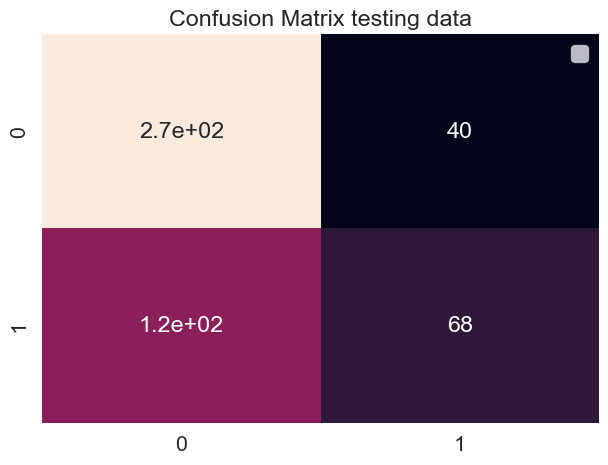

In [133]:
#  Confusion matrix
from sklearn.metrics import confusion_matrix
# Make Predictions
pred1=model_rf.predict(np.array(x_test))
plt.title("Confusion Matrix testing data")
sns.heatmap(confusion_matrix(y_test,pred1),annot=True,cbar=False)
plt.legend()
plt.show()

### XG Boost

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.9, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0.99, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=8,
              n_jobs=None, nthread=5, ...)

In [109]:
print('Accuracy of XGBoost classifier on training set: {:.2f}'
     .format(xgb.score(x_train, y_train)))
print('Accuracy of XGBoost classifier on test set: {:.2f}'
     .format(xgb.score(x_test, y_test)))

Accuracy of XGBoost classifier on training set: 0.72
Accuracy of XGBoost classifier on test set: 0.65


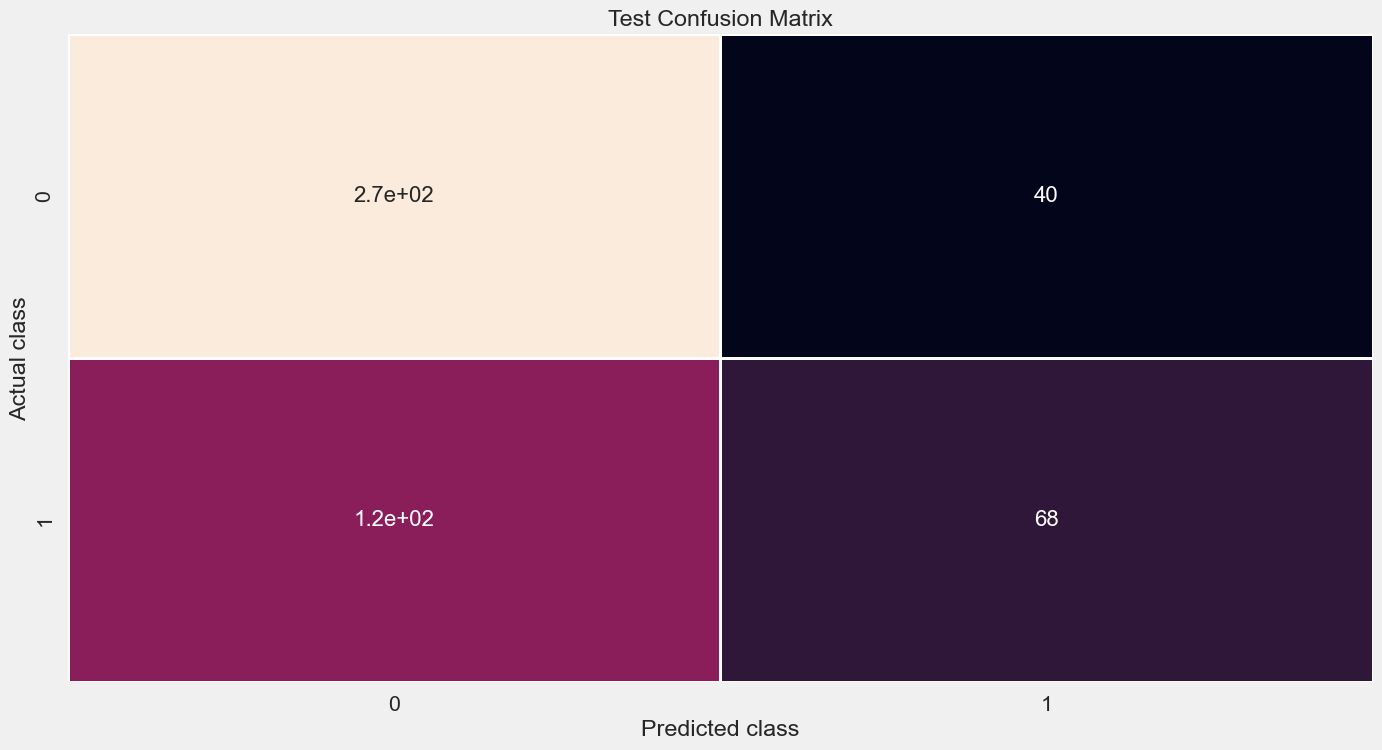

In [110]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
plt.figure(figsize = (15, 8))
sns.set(font_scale=1.4) # for label size
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 16},cbar=False, linewidths = 1) # font size
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.savefig('conf_test.png')
plt.show()

### SVM tuned

In [111]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svc=SVC()
param_grid={'C':[1.2,1.5,2.2,3.5,3.2,4.1],'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'degree':[1,2,4,8,10],'gamma':['scale','auto']}
gridsearch=GridSearchCV(svc,param_grid=param_grid,n_jobs=-1,verbose=4,cv=3)
gridsearch.fit(x_train,y_train)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1.2, 1.5, 2.2, 3.5, 3.2, 4.1],
                         'degree': [1, 2, 4, 8, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=4)

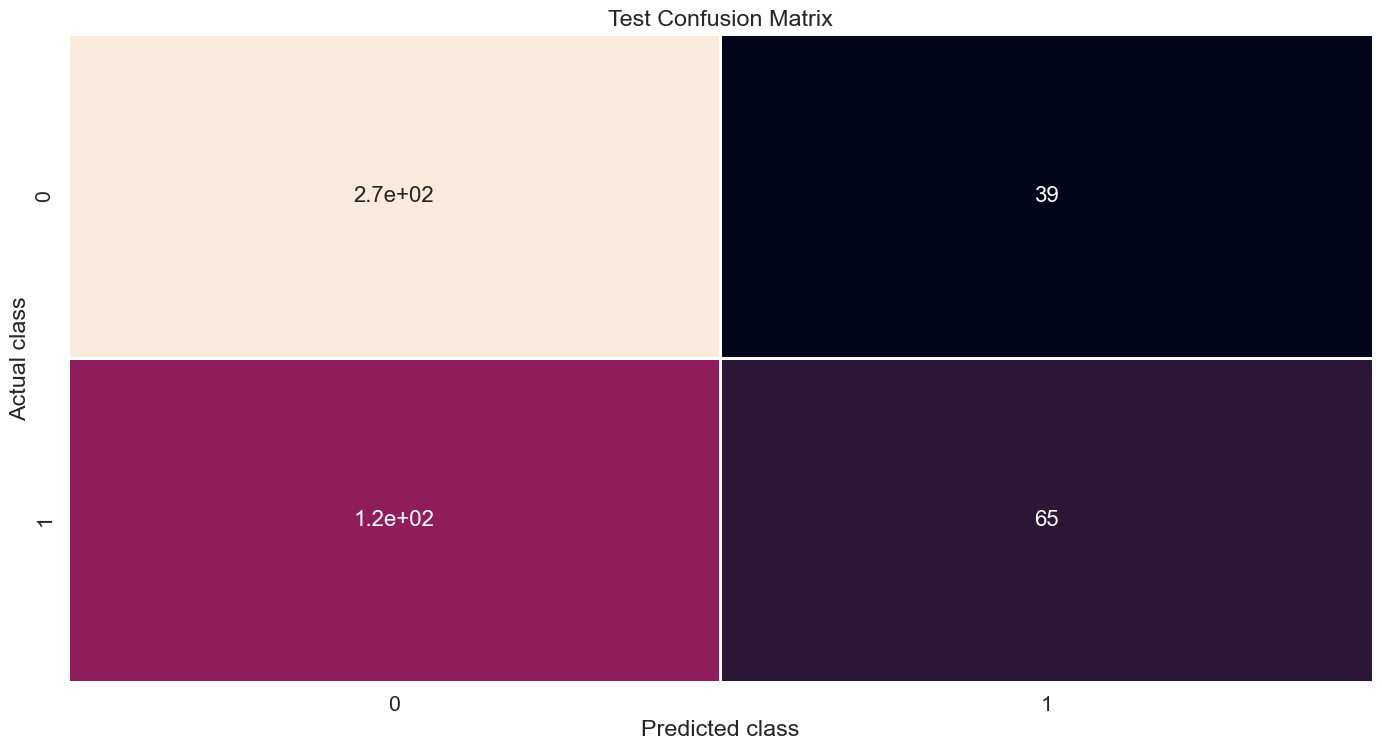

In [112]:
y_pred=gridsearch.predict(x_test)
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
plt.figure(figsize = (15, 8))
sns.set(font_scale=1.4) # for label size
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 16},cbar=False, linewidths = 1) # font size
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.savefig('conf_test.png')
plt.show()